# UCLA CS M148 Final Project - 24 Fall
by: Morgan Mason, Andrew Zhang, Pallavi Srinivas

In this project, we explored a dataset that collected information about students and their test scores. \
We wish to explore how these factors contribute to students improving their test scores

# i) Exploratory Data Analysis

in this section we will be exploring the our data

In [131]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [132]:
# loading data and taking sample
original_dataset_df = pd.read_csv("StudentPerformanceFactors.csv")
original_dataset_df.sample(10)

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
5648             29          81               Medium              Medium   
5346             18          96               Medium                High   
4209             13          82               Medium              Medium   
1037             11          94                  Low                High   
5433             18          76               Medium              Medium   
501              31          93                 High                 Low   
1389             15          85               Medium              Medium   
1455              9          76               Medium              Medium   
3961             31          94                  Low              Medium   
1982             16          80                 High                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
5648                        Yes            7               52   
5346                        Yes            9               80   
4209                        Yes            7               88   
1037                        Yes            8               92   
5433                         No            8               88   
501                         Yes            5               96   
1389                         No            8               58   
1455                         No            7               79   
3961                         No            5               92   
1982                         No            9               58   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
5648           Medium              No                  1          High   
5346             High             Yes                  1           Low   
4209           Medium             Yes                  0           Low   
1037             High             Yes                  0        Medium   
5433              Low             Yes                  1        Medium   
501            Medium             Yes                  2           Low   
1389             High             Yes                  1           Low   
1455           Medium             Yes                  1        Medium   
3961              Low             Yes                  1          High   
1982              Low             Yes                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
5648          Medium      Public        Neutral                  4   
5346          Medium      Public       Positive                  3   
4209          Medium      Public        Neutral                  2   
1037          Medium      Public        Neutral                  4   
5433          Medium      Public        Neutral                  4   
501           Medium      Public       Positive                  2   
1389          Medium     Private       Negative                  3   
1455          Medium      Public       Negative                  3   
3961             Low     Private        Neutral                  4   
1982          Medium      Public        Neutral                  2   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
5648                    No                  College               Near   
5346                    No                  College               Near   
4209                    No              High School               Near   
1037                    No              High School               Near   
5433                    No                  College               Near   
501                     No              High School               Near   
1389                    No                  College               Near   
1455                    No                  College               Near   
3961                    No              High School               Near   
1982                    No              High School               Near   

      Gender  Exam_Score  
5648  Female          69 

from : https://www.kaggle.com/datasets/lainguyn123/student-performance-factors


## what does each var measure


the kaggle website includes a table of variables and what they measure
- however, some categorical variables do not clarify how category was determined or what they mean

### About the Dataset
(https://www.kaggle.com/datasets/lainguyn123/student-performance-factors)

| Attribute | Description |
|---|---|
| Hours_Studied | Number of hours spent studying per week. |
| Attendance | Percentage of classes attended. |
| Parental_Involvement | Level of parental involvement in the student's education (Low, Medium, High). |
| Access_to_Resources | Availability of educational resources (Low, Medium, High). |
| Extracurricular_Activities | Participation in extracurricular activities (Yes, No). |
| Sleep_Hours | Average number of hours of sleep per night. |
| Previous_Scores | Scores from previous exams. |
| Motivation_Level | Student's level of motivation (Low, Medium, High). |
| Internet_Access | Availability of internet access (Yes, No). |
| Tutoring_Sessions | Number of tutoring sessions attended per month. |
| Family_Income | Family income level (Low, Medium, High). |
| Teacher_Quality | Quality of the teachers (Low, Medium, High). |
| School_Type | Type of school attended (Public, Private). |
| Peer_Influence | Influence of peers on academic performance (Positive, Neutral, Negative). |
| Physical_Activity | Average number of hours of physical activity per week. |
| Learning_Disabilities | Presence of learning disabilities (Yes, No). |
| Parental_Education_Level | Highest education level of parents (High School, College, Postgraduate). |
| Distance_from_Home | Distance from home to school (Near, Moderate, Far). |
| Gender | Gender of the student (Male, Female). |
| Exam_Score | Final exam score. |


### how was data collected
according to documentation, it is synthetic data

### observational units
each observation is a single student

### data relevancy
Hours_Studied, Previous_Scores, Motivation_Level, Exam_Score are the most relevant fields for our exploration in.

Other variables we might want to explore include: parental involvement, access to resources, tutoring sessions, peer influence

### questions, assumptions
- How is motivation level measured, what does it represent
- will motivation level be too correlated with other variables (hours studied) 

## Exploring data

In [133]:
# shape of df
original_dataset_df.shape

(6607, 20)

we have 20 variables and 6607 samples

In [134]:
original_dataset_df.describe()

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000   101.000000

In [135]:
original_dataset_df[original_dataset_df['Exam_Score']>100]

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
1525             27          98                  Low              Medium   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
1525                        Yes            6               93   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
1525              Low              No                  5          High   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
1525            High      Public       Positive                  3   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
1525                    No              High School           Moderate   

      Gender  Exam_Score  
1525  Female         101

C:\Users\morga\AppData\Local\Temp\ipykernel_24336\3183833376.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

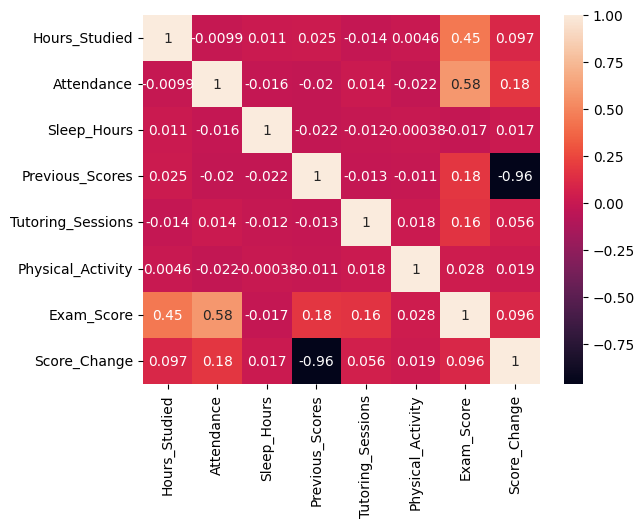

In [136]:
numerical_cols = original_dataset_df.select_dtypes(include=["int64"]).columns
corr_ds = original_dataset_df[numerical_cols]
corr_ds["Score_Change"] = corr_ds["Exam_Score"] - corr_ds["Previous_Scores"] 
sns.heatmap(corr_ds.corr(), annot=True)


In [137]:
(original_dataset_df['Exam_Score'] <= original_dataset_df['Previous_Scores']).sum(), (original_dataset_df['Exam_Score'] > original_dataset_df['Previous_Scores']).sum()

(4467, 2140)

Notes on distribution of data
- hours studies: the information seems reasonable though the max does seem high\
- exam scores : the max says there was an exam score of 101- this doesn't seem appropriate
  - because there was only one such outlier, we will remove it later
- hours studied and attendance have the highest correlation with exam scores
  - previous score are highly negatively correlated
- we have more examples of students not improving than students improving


In [138]:
for column in original_dataset_df.columns:
    print(f"Column: {column}, Data Type: {original_dataset_df[column].dtype}")
    if original_dataset_df[column].dtype == 'object':
        print(f"Categories: {original_dataset_df[column].unique()}")
    if original_dataset_df[column].dtype in ['int64', 'float64']:
        print(f"5-Number Summary: \n{original_dataset_df[column].describe()[['min', '25%', '50%', '75%', 'max']]}")
        print(f"Mean: {original_dataset_df[column].mean():.5}")
        print(f"Standard Deviation: {original_dataset_df[column].std():.5}")
        print(f"Skewness: {original_dataset_df[column].skew():.5}")
        print(f"Kurtosis: {original_dataset_df[column].kurt():.5}")
    print("-" * 20)

Column: Hours_Studied, Data Type: int64
5-Number Summary: 
min     1.0
25%    16.0
50%    20.0
75%    24.0
max    44.0
Name: Hours_Studied, dtype: float64
Mean: 19.975
Standard Deviation: 5.9906
Skewness: 0.013499
Kurtosis: 0.017771
--------------------
Column: Attendance, Data Type: int64
5-Number Summary: 
min     60.0
25%     70.0
50%     80.0
75%     90.0
max    100.0
Name: Attendance, dtype: float64
Mean: 79.977
Standard Deviation: 11.547
Skewness: 0.013666
Kurtosis: -1.1944
--------------------
Column: Parental_Involvement, Data Type: object
Categories: ['Low' 'Medium' 'High']
--------------------
Column: Access_to_Resources, Data Type: object
Categories: ['High' 'Medium' 'Low']
--------------------
Column: Extracurricular_Activities, Data Type: object
Categories: ['No' 'Yes']
--------------------
Column: Sleep_Hours, Data Type: int64
5-Number Summary: 
min     4.0
25%     6.0
50%     7.0
75%     8.0
max    10.0
Name: Sleep_Hours, dtype: float64
Mean: 7.0291
Standard Deviation: 1

count    6607.000000
mean       19.975329
std         5.990594
min         1.000000
25%        16.000000
50%        20.000000
75%        24.000000
max        44.000000
Name: Hours_Studied, dtype: float64
----


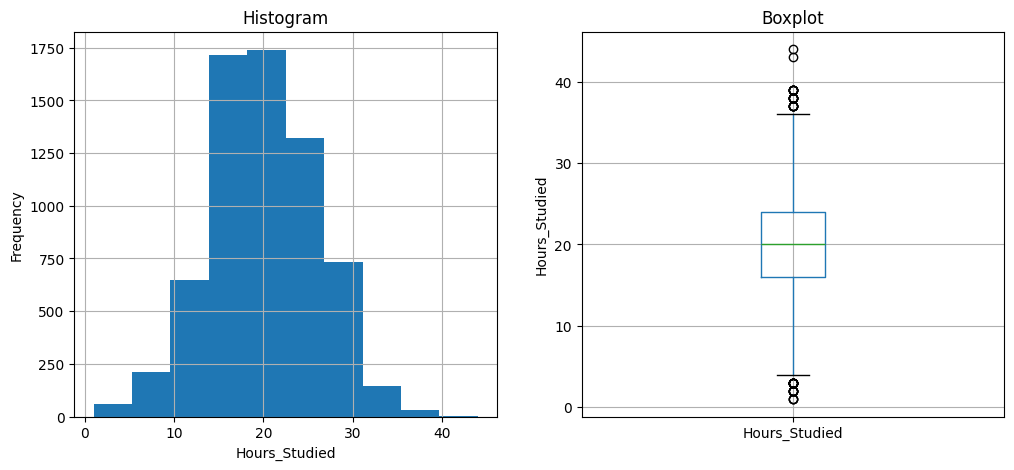

count    6607.000000
mean       79.977448
std        11.547475
min        60.000000
25%        70.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: Attendance, dtype: float64
----


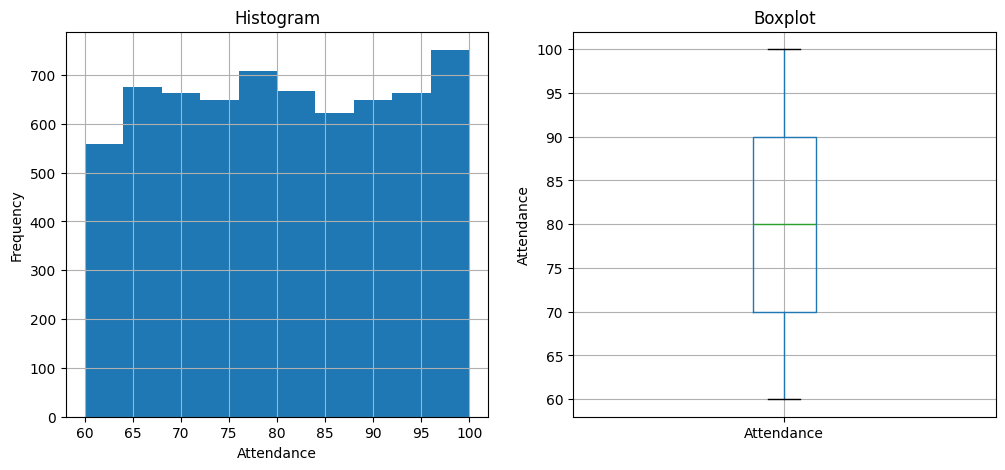

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64
----
count       6607
unique         3
top       Medium
freq        3362
Name: Parental_Involvement, dtype: object
----


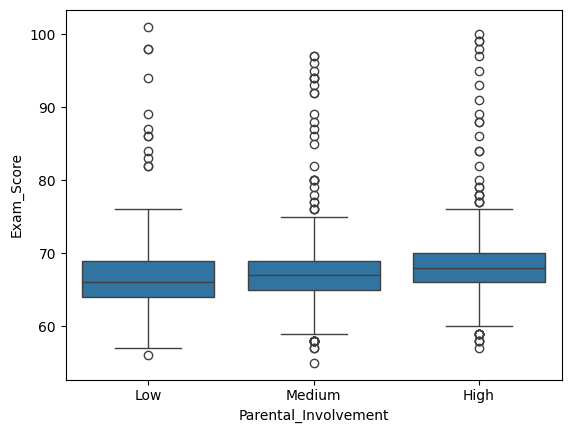

Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64
----
count       6607
unique         3
top       Medium
freq        3319
Name: Access_to_Resources, dtype: object
----


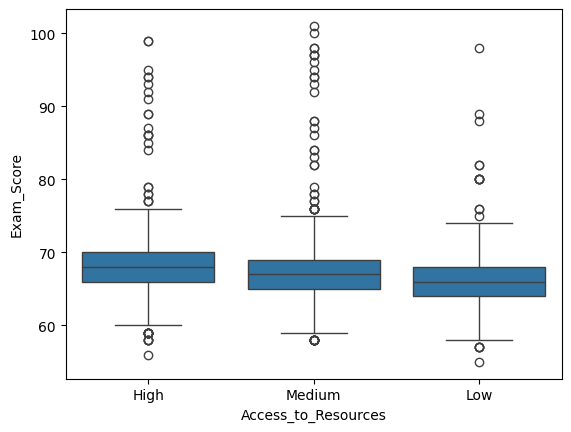

Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64
----
count     6607
unique       2
top        Yes
freq      3938
Name: Extracurricular_Activities, dtype: object
----


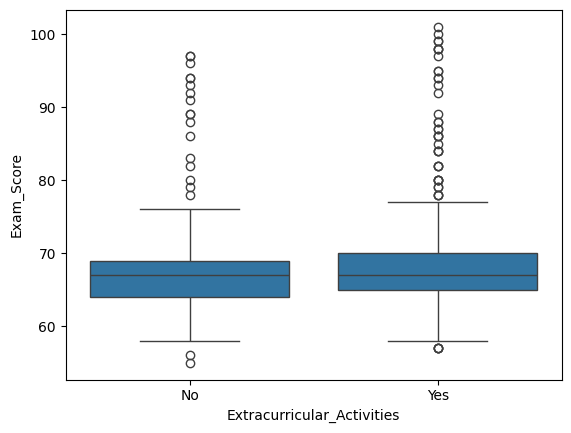

count    6607.00000
mean        7.02906
std         1.46812
min         4.00000
25%         6.00000
50%         7.00000
75%         8.00000
max        10.00000
Name: Sleep_Hours, dtype: float64
----


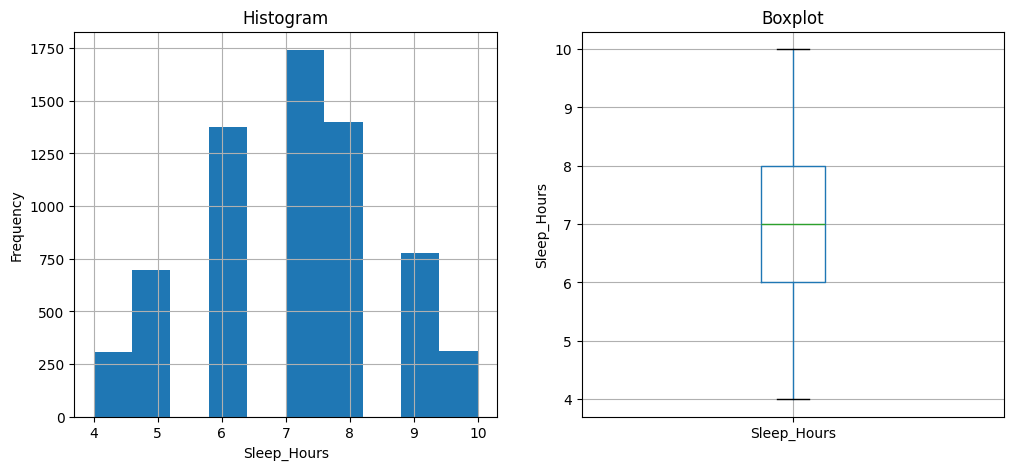

count    6607.000000
mean       75.070531
std        14.399784
min        50.000000
25%        63.000000
50%        75.000000
75%        88.000000
max       100.000000
Name: Previous_Scores, dtype: float64
----


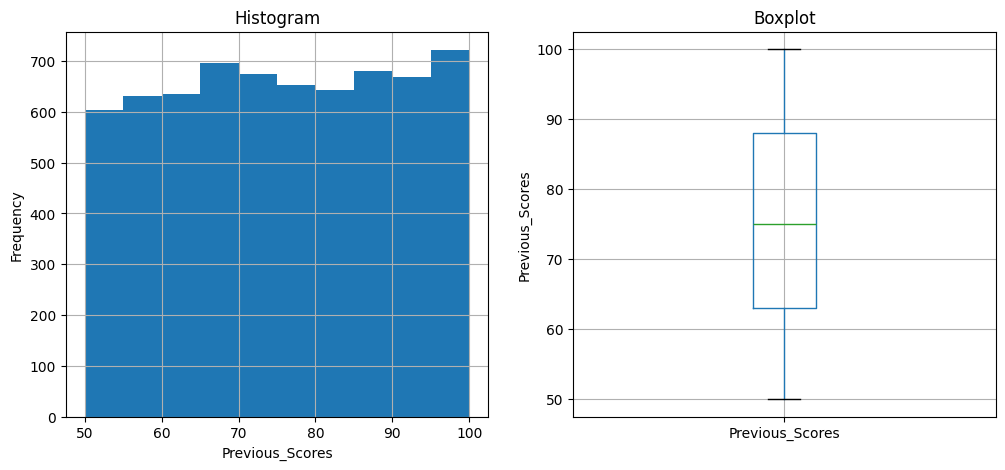

Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64
----
count       6607
unique         3
top       Medium
freq        3351
Name: Motivation_Level, dtype: object
----


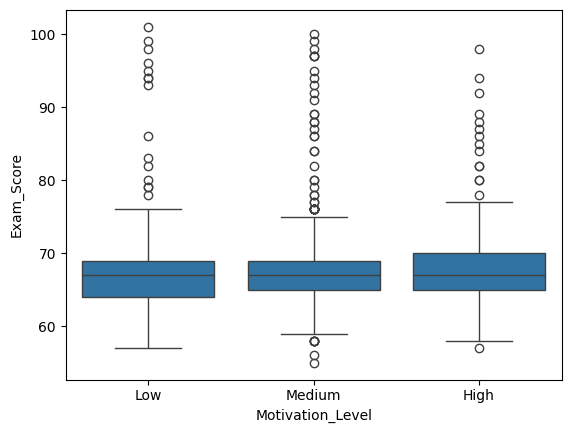

Internet_Access
Yes    6108
No      499
Name: count, dtype: int64
----
count     6607
unique       2
top        Yes
freq      6108
Name: Internet_Access, dtype: object
----


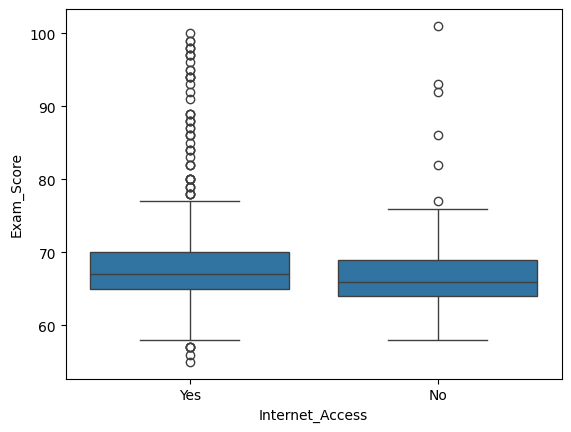

count    6607.000000
mean        1.493719
std         1.230570
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: Tutoring_Sessions, dtype: float64
----


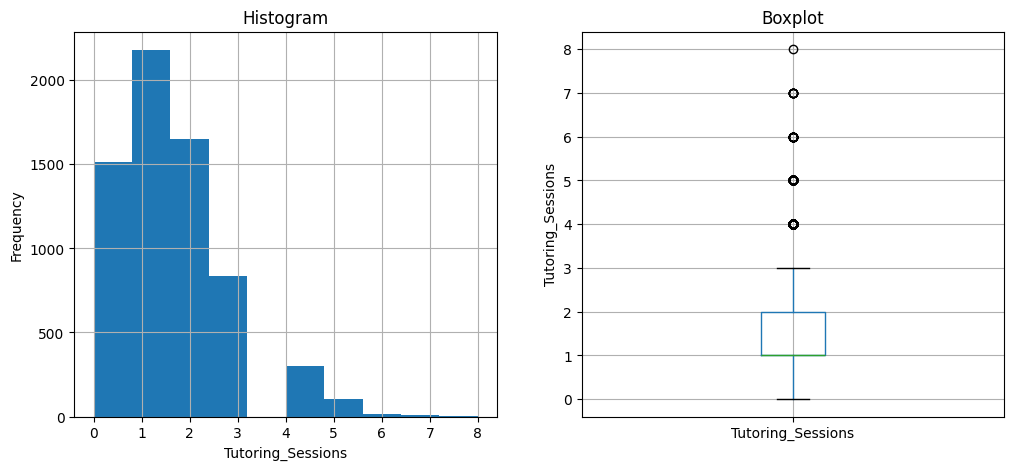

Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64
----
count     6607
unique       3
top        Low
freq      2672
Name: Family_Income, dtype: object
----


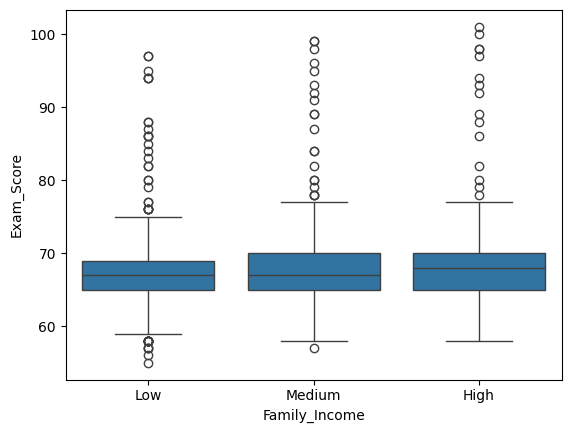

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64
----
count       6529
unique         3
top       Medium
freq        3925
Name: Teacher_Quality, dtype: object
----


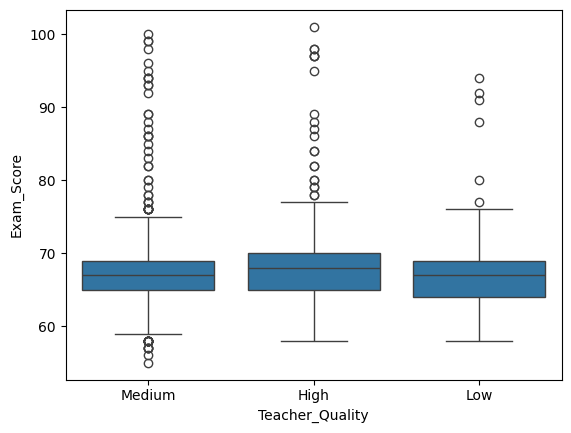

School_Type
Public     4598
Private    2009
Name: count, dtype: int64
----
count       6607
unique         2
top       Public
freq        4598
Name: School_Type, dtype: object
----


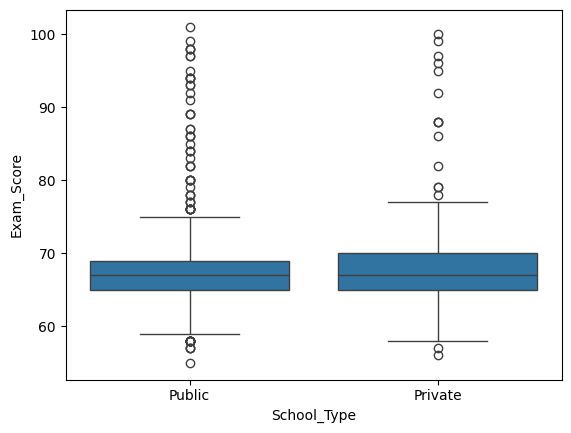

Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64
----
count         6607
unique           3
top       Positive
freq          2638
Name: Peer_Influence, dtype: object
----


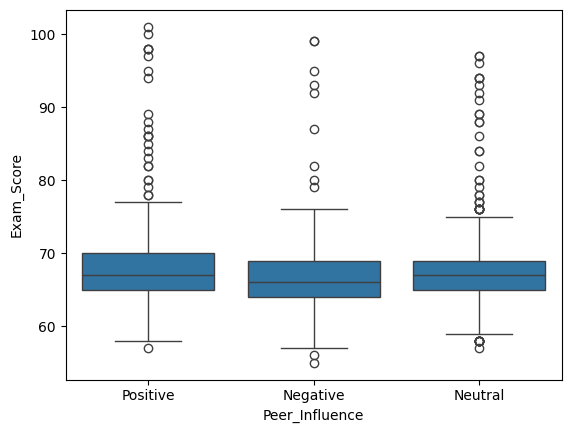

count    6607.000000
mean        2.967610
std         1.031231
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: Physical_Activity, dtype: float64
----


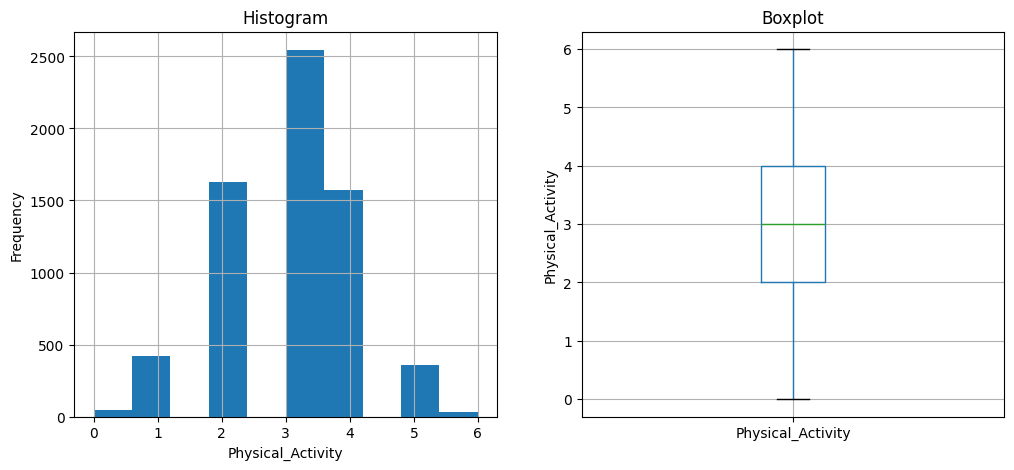

Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64
----
count     6607
unique       2
top         No
freq      5912
Name: Learning_Disabilities, dtype: object
----


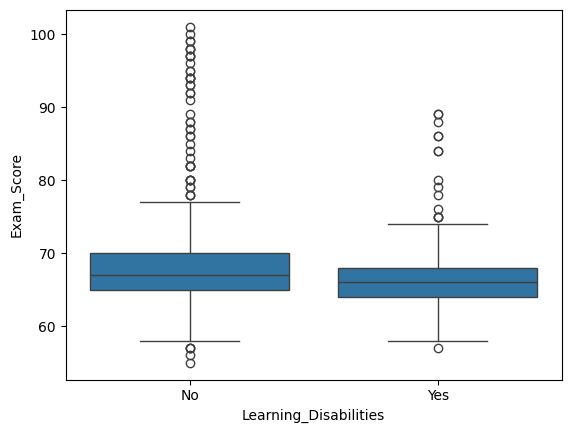

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64
----
count            6517
unique              3
top       High School
freq             3223
Name: Parental_Education_Level, dtype: object
----


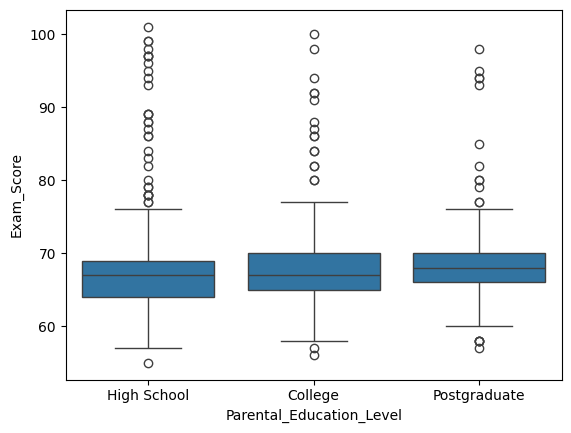

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64
----
count     6540
unique       3
top       Near
freq      3884
Name: Distance_from_Home, dtype: object
----


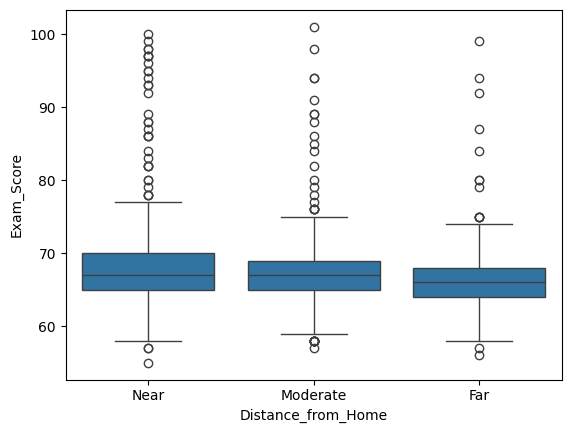

Gender
Male      3814
Female    2793
Name: count, dtype: int64
----
count     6607
unique       2
top       Male
freq      3814
Name: Gender, dtype: object
----


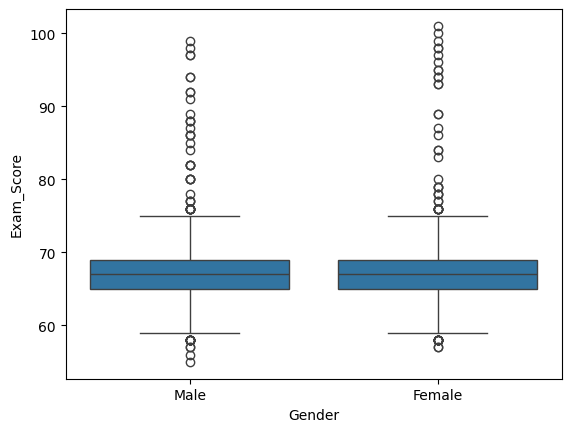

count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64
----


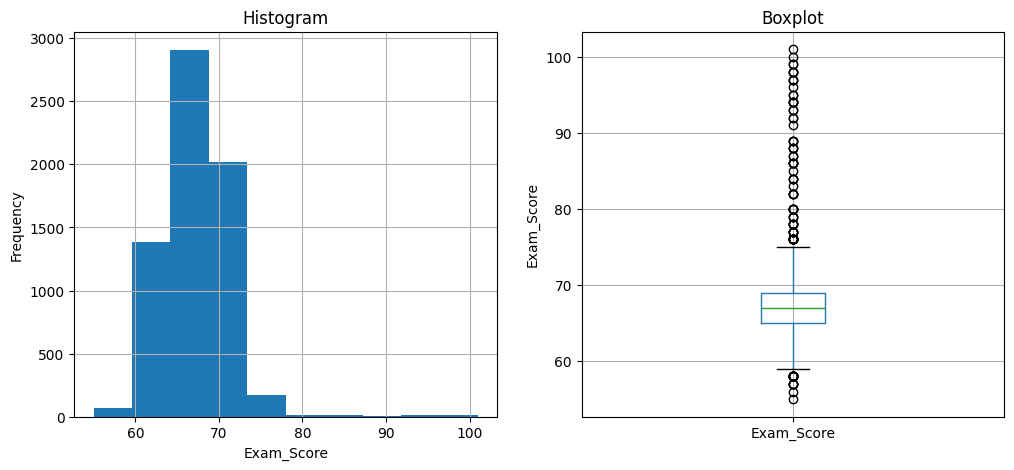

In [139]:
def explore_var(df, var):
  if df[var].dtype == "object":
    explore_cat(df, var)
  else:
    explore_num(df, var)


def explore_cat(df, var):
  print(df[var].value_counts())
  print("----")
  print(df[var].describe())
  print("----")
  sns.boxplot(x=var,y="Exam_Score", data=df)
  plt.show()


def explore_num(df, var):
  plt.figure(figsize=(12, 5))

  print(df[var].describe())
  print("----")
  plt.subplot(1, 2, 1)
  df[var].hist()
  plt.xlabel(var)
  plt.ylabel('Frequency')
  plt.title('Histogram')

  plt.subplot(1, 2, 2)
  df.boxplot(column=var)
  plt.ylabel(var)
  plt.title('Boxplot')

  plt.show()

for c in original_dataset_df.columns:
  explore_var(original_dataset_df,c)

## Missing Data

In [140]:
# number of nans in each column 
nan = original_dataset_df.isna().sum()
nan[nan > 0]

Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64

In [141]:
nan_rows = original_dataset_df.isna().any(axis=1)
count_nan_rows = nan_rows.sum()
count_nan_rows 

229

we only have 229 data points with nans- a small proportion relative to the full 6607

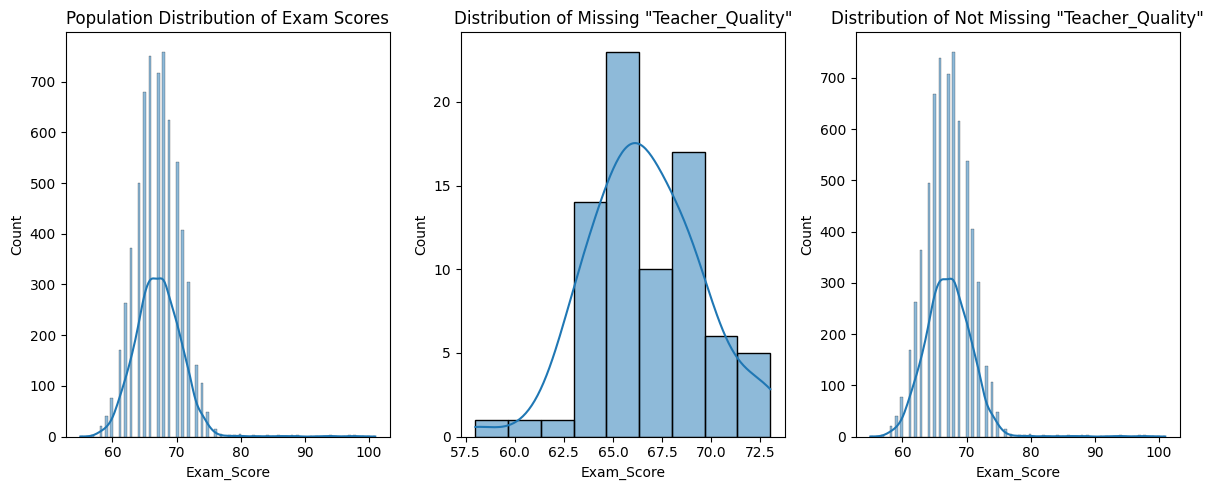

[67.23565914938702, 66.64102564102564, 67.24276305712974]


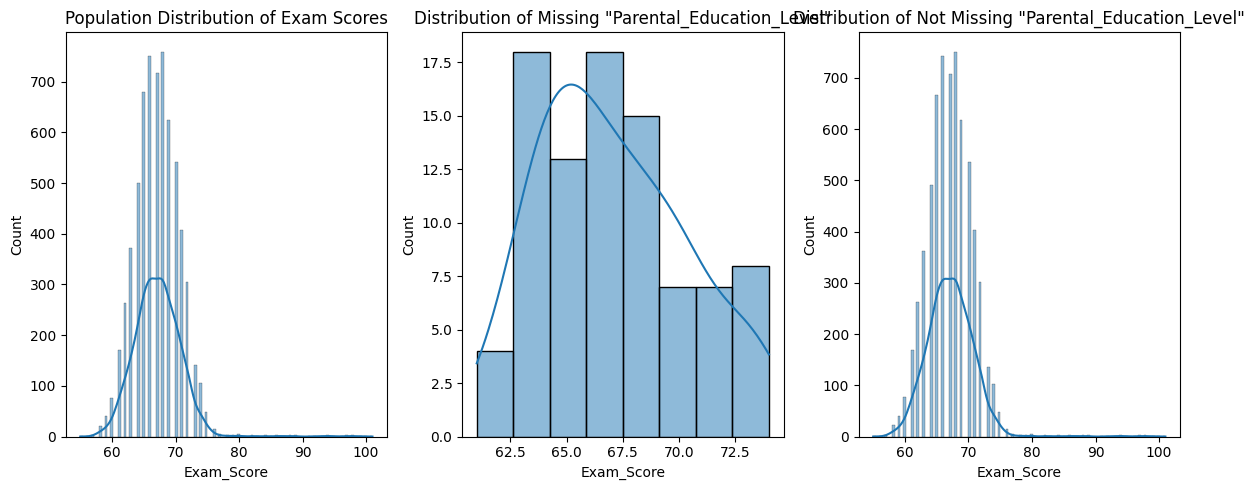

[67.23565914938702, 67.05555555555556, 67.2381463863741]


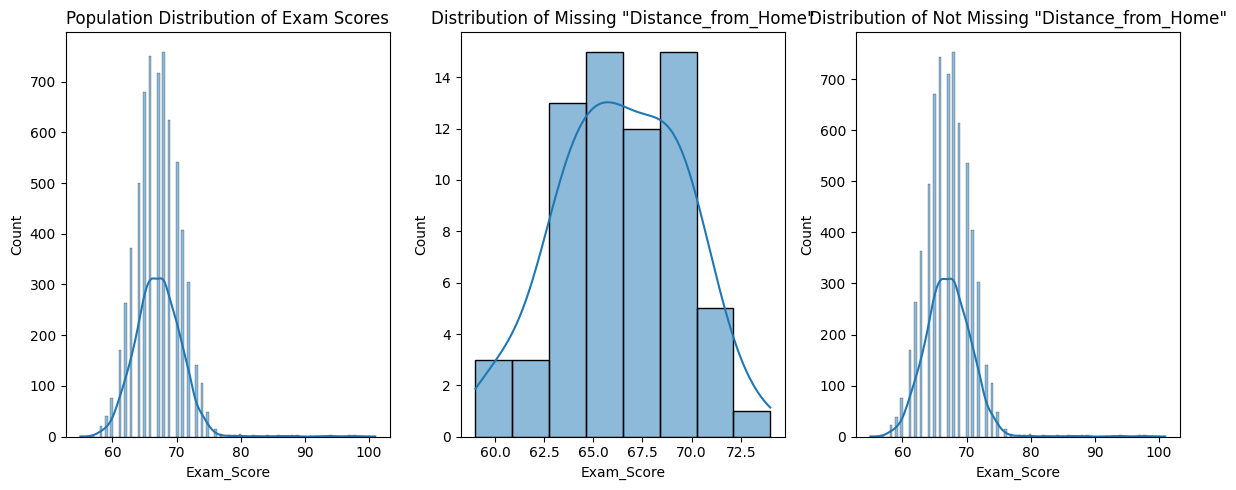

[67.23565914938702, 66.43283582089552, 67.24388379204893]


In [142]:
# Exploring the distributions between missing and non missing population
for column in original_dataset_df.columns:
    if original_dataset_df[column].isnull().any():  # Check for missing data in the column
        # Create a figure and axes for the plots   
        means = [0] * 3
        fig, axes = plt.subplots(1, 3, figsize=(12, 5))

        # Plot the distribution of exam scores for the population
        sns.histplot(original_dataset_df['Exam_Score'], ax=axes[0], kde=True)
        axes[0].set_title('Population Distribution of Exam Scores')
        means[0] = original_dataset_df["Exam_Score"].mean()

        # Plot the distribution of exam scores for the subset with missing data in the current column
        subset = original_dataset_df[original_dataset_df[column].isnull()]
        sns.histplot(subset['Exam_Score'], ax=axes[1], kde=True)
        axes[1].set_title(f'Distribution of Missing "{column}"')
        means[1] = subset["Exam_Score"].mean()

        subset = original_dataset_df[~original_dataset_df[column].isnull()]
        sns.histplot(subset['Exam_Score'], ax=axes[2], kde=True)
        axes[2].set_title(f'Distribution of Not Missing "{column}"')
        means[2] = subset["Exam_Score"].mean()

        plt.tight_layout()
        plt.show()
        print(means)

for each column with missing values, we have created a histogram to explore the distribution of
- the entire population
- the part of a population with a missing value in the column
- the part of the population without a missing value

although the missing-population has a slightly lower mean value, the difference between the total population and the not-missing population is on the order of 1/100
- for this reason, we have chosen to drop the data with missing columns

# ii) Data Preprocessing

In [143]:
import pandas as pd

We intend to perform the following transformations 
- remove any row with NAN
- remove row with Exam Score > 100 
- one-hot encode categorical variables
- create a column, improvement = Exam_Score - Previous_Scores
- rename other columns

Notes:
- 'duplicates' will be assumed to be separate students with the same metrics

In [144]:
original_dataset_df = pd.read_csv("StudentPerformanceFactors.csv")
original_dataset_df.sample(5)

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
2740             22          91               Medium              Medium   
433              24          63                 High                 Low   
3356             20          60               Medium              Medium   
5428             15          86                 High              Medium   
4584             19          99                 High              Medium   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
2740                        Yes            8               64   
433                         Yes            7               91   
3356                        Yes            6               70   
5428                        Yes            8               66   
4584                        Yes            6              100   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
2740           Medium             Yes                  1           Low   
433               Low             Yes                  4           Low   
3356           Medium             Yes                  2           Low   
5428              Low             Yes                  0        Medium   
4584           Medium             Yes                  1           Low   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
2740            High      Public       Positive                  3   
433           Medium     Private       Positive                  4   
3356          Medium      Public        Neutral                  3   
5428            High     Private       Positive                  5   
4584          Medium     Private       Positive                  1   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
2740                   Yes              High School           Moderate   
433                     No              High School               Near   
3356                   Yes             Postgraduate               Near   
5428                    No                  College               Near   
4584                    No              High School           Moderate   

      Gender  Exam_Score  
2740    Male          68  
433   Female          67  
3356  Female          63  
5428    Male          68  
4584    Male          72

### remove nans

In [145]:
print("Original:\tany Nans?", original_dataset_df.isna().any().any())
no_nan_df = original_dataset_df.dropna()
print("New:\t\tany Nans?", no_nan_df.isna().any().any())
no_nan_df.sample(5)


Original:	any Nans? True
New:		any Nans? False


Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
3478             27          85                 High              Medium   
6165             16          76                  Low              Medium   
2382             22          77                 High                 Low   
5147             19          92               Medium              Medium   
5728             21          99                 High              Medium   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
3478                        Yes            8               66   
6165                         No            6               87   
2382                        Yes            7               70   
5147                        Yes            7               90   
5728                        Yes            6               65   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
3478           Medium             Yes                  2           Low   
6165           Medium             Yes                  3           Low   
2382           Medium             Yes                  2        Medium   
5147           Medium             Yes                  1           Low   
5728              Low             Yes                  1        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
3478            High     Private        Neutral                  4   
6165          Medium     Private        Neutral                  4   
2382          Medium     Private       Positive                  4   
5147            High      Public       Positive                  2   
5728          Medium     Private       Positive                  2   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
3478                   Yes              High School           Moderate   
6165                    No                  College               Near   
2382                    No             Postgraduate               Near   
5147                    No              High School               Near   
5728                    No                  College                Far   

      Gender  Exam_Score  
3478    Male          70  
6165  Female          65  
2382    Male          69  
5147  Female          70  
5728  Female          71

### remove the Exam_Score > 100 because it is incorrect

In [146]:
print("Original:\t # Exam_Score>100", len(no_nan_df[no_nan_df['Exam_Score'] > 100]))
no_gt100_df = no_nan_df.drop(no_nan_df[no_nan_df["Exam_Score"] > 100].index)
print("New:\t\t # Exam_Score>100", len(no_gt100_df[no_gt100_df['Exam_Score'] > 100]))
no_gt100_df.sample(5)

Original:	 # Exam_Score>100 1
New:		 # Exam_Score>100 0


Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
3943              6          98               Medium                 Low   
671               8          94                 High                 Low   
2659             23          67               Medium              Medium   
1541             31          64                 High                 Low   
6195             19          74               Medium                High   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
3943                         No            8               75   
671                          No            8               89   
2659                         No            7               98   
1541                        Yes            7               81   
6195                         No            9               82   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
3943           Medium             Yes                  1          High   
671              High             Yes                  0        Medium   
2659              Low             Yes                  4           Low   
1541              Low             Yes                  1        Medium   
6195             High             Yes                  2           Low   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
3943          Medium      Public        Neutral                  3   
671           Medium      Public        Neutral                  2   
2659          Medium     Private        Neutral                  3   
1541          Medium      Public       Positive                  4   
6195          Medium     Private        Neutral                  3   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
3943                   Yes             Postgraduate                Far   
671                     No              High School               Near   
2659                    No              High School           Moderate   
1541                    No              High School               Near   
6195                    No              High School           Moderate   

      Gender  Exam_Score  
3943  Female          64  
671   Female          66  
2659    Male          66  
1541  Female          67  
6195    Male          66

### rename columns and other transforms

In [147]:
renames = {
    "Hours_Studied" : "Hours_Studied_Per_Week"
}
transforms = {
    #"column name" : lamda x: transform(x)
}


rename_transformed_df = no_gt100_df.rename(columns=renames)
for k, v in transforms.items():
  rename_transformed_df[k] = rename_transformed_df[k].apply(v)

rename_transformed_df.sample(5)

Hours_Studied_Per_Week  Attendance Parental_Involvement  \
2760                      24          61               Medium   
5201                      17          77               Medium   
4813                      15          93               Medium   
133                       23          77               Medium   
2947                       2          67               Medium   

     Access_to_Resources Extracurricular_Activities  Sleep_Hours  \
2760              Medium                        Yes            8   
5201                High                        Yes           10   
4813              Medium                        Yes            7   
133               Medium                        Yes            7   
2947              Medium                         No            6   

      Previous_Scores Motivation_Level Internet_Access  Tutoring_Sessions  \
2760               88              Low             Yes                  1   
5201               93              Low             Yes                  3   
4813               78              Low             Yes                  0   
133                79           Medium             Yes                  0   
2947               73              Low             Yes                  1   

     Family_Income Teacher_Quality School_Type Peer_Influence  \
2760           Low          Medium     Private       Positive   
5201          High            High     Private       Positive   
4813        Medium          Medium      Public       Negative   
133            Low            High      Public        Neutral   
2947           Low          Medium     Private       Positive   

      Physical_Activity Learning_Disabilities Parental_Education_Level  \
2760                  4                    No              High School   
5201                  1                    No                  College   
4813                  4                    No              High School   
133                   2                    No              High School   
2947                  2                    No                  College   

     Distance_from_Home  Gender  Exam_Score  
2760           Moderate  Female          64  
5201                Far  Female          68  
4813           Moderate    Male          66  
133            Moderate    Male          66  
2947           Moderate    Male          58

### get dummy values for categorical data

In [148]:
oh_df = pd.get_dummies(rename_transformed_df, columns=rename_transformed_df.select_dtypes(include=['object']).columns)
oh_df.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
2255                      22          63            8               97   
2180                      19          85            7               78   
3919                      20          89            6               91   
4465                      13          68            7               60   
1735                      10          93            7               52   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
2255                  5                  3          69   
2180                  2                  3          69   
3919                  0                  4          70   
4465                  1                  3          61   
1735                  2                  3          66   

      Parental_Involvement_High  Parental_Involvement_Low  \
2255                      False                     False   
2180                       True                     False   
3919                      False                      True   
4465                      False                      True   
1735                      False                      True   

      Parental_Involvement_Medium  ...  Learning_Disabilities_No  \
2255                         True  ...                      True   
2180                        False  ...                      True   
3919                        False  ...                      True   
4465                        False  ...                      True   
1735                        False  ...                      True   

      Learning_Disabilities_Yes  Parental_Education_Level_College  \
2255                      False                             False   
2180                      False                              True   
3919                      False                              True   
4465                      False                              True   
1735                      False                             False   

      Parental_Education_Level_High School  \
2255                                  True   
2180                                 False   
3919                                 False   
4465                                 False   
1735                                 False   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
2255                                  False                   False   
2180                                  False                   False   
3919                                  False                   False   
4465                                  False                   False   
1735                                   True                   False   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
2255                        False                     True          False   
2180                        False                     True          False   
3919                        False                     True          False   
4465                         True                    False           True   
1735                        False                     True          False   

      Gender_Male  
2255         True  
2180         True  
3919         True  
4465        False  
1735         True  

[5 rows x 41 columns]

the naming of the new dummy variables seems intuitive enough that we do not feel that we need to rename them

### adding score change column

In [149]:
diff_score_df = oh_df #this technically still is same df, just name to make it easier to understand
diff_score_df["Score_Change"] = diff_score_df["Exam_Score"] - diff_score_df["Previous_Scores"]
diff_score_df.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
5877                      22          62            8               60   
3796                      19          88            6               66   
6065                      18          75            7               53   
3563                      27          88            7               60   
1940                      22          88            5               60   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
5877                  0                  2          61   
3796                  3                  2          70   
6065                  0                  2          63   
3563                  2                  2          72   
1940                  1                  2          67   

      Parental_Involvement_High  Parental_Involvement_Low  \
5877                      False                      True   
3796                       True                     False   
6065                      False                     False   
3563                       True                     False   
1940                      False                     False   

      Parental_Involvement_Medium  ...  Learning_Disabilities_Yes  \
5877                        False  ...                      False   
3796                        False  ...                      False   
6065                         True  ...                      False   
3563                        False  ...                      False   
1940                         True  ...                      False   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
5877                              True                                 False   
3796                             False                                  True   
6065                             False                                  True   
3563                             False                                  True   
1940                             False                                  True   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
5877                                  False                   False   
3796                                  False                   False   
6065                                  False                   False   
3563                                  False                   False   
1940                                  False                   False   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
5877                        False                     True          False   
3796                        False                     True           True   
6065                        False                     True          False   
3563                        False                     True           True   
1940                         True                    False          False   

      Gender_Male  Score_Change  
5877         True             1  
3796        False             4  
6065         True            10  
3563        False            12  
1940         True             7  

[5 rows x 42 columns]

In [150]:
diff_score_df["Score_Change"].describe()

count    6377.000000
mean       -7.816528
std        14.249124
min       -39.000000
25%       -20.000000
50%        -8.000000
75%         4.000000
max        41.000000
Name: Score_Change, dtype: float64

its interesting to se that the majority of students had their scores worsen

### save data

In [151]:
df = diff_score_df
df.to_csv("transformed_data.csv", index=False)

In [152]:
df = pd.read_csv("transformed_data.csv")
df.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
495                       15          98            8               69   
841                       16          85            7               93   
1479                       3          96            9               59   
2517                      28          83            7               76   
1641                      27          94            6               86   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
495                   2                  4          68   
841                   1                  3          68   
1479                  2                  3          66   
2517                  1                  3          71   
1641                  2                  2          71   

      Parental_Involvement_High  Parental_Involvement_Low  \
495                       False                      True   
841                       False                      True   
1479                       True                     False   
2517                      False                     False   
1641                      False                     False   

      Parental_Involvement_Medium  ...  Learning_Disabilities_Yes  \
495                         False  ...                      False   
841                         False  ...                      False   
1479                        False  ...                      False   
2517                         True  ...                      False   
1641                         True  ...                      False   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
495                              False                                  True   
841                              False                                  True   
1479                              True                                 False   
2517                              True                                 False   
1641                             False                                  True   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
495                                   False                   False   
841                                   False                   False   
1479                                  False                   False   
2517                                  False                   False   
1641                                  False                   False   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
495                          True                    False           True   
841                         False                     True          False   
1479                         True                    False           True   
2517                        False                     True          False   
1641                        False                     True           True   

      Gender_Male  Score_Change  
495         False            -1  
841          True           -25  
1479        False             7  
2517         True            -5  
1641        False           -15  

[5 rows x 42 columns]

In [153]:
df.columns

Index(['Hours_Studied_Per_Week', 'Attendance', 'Sleep_Hours',
       'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity',
       'Exam_Score', 'Parental_Involvement_High', 'Parental_Involvement_Low',
       'Parental_Involvement_Medium', 'Access_to_Resources_High',
       'Access_to_Resources_Low', 'Access_to_Resources_Medium',
       'Extracurricular_Activities_No', 'Extracurricular_Activities_Yes',
       'Motivation_Level_High', 'Motivation_Level_Low',
       'Motivation_Level_Medium', 'Internet_Access_No', 'Internet_Access_Yes',
       'Family_Income_High', 'Family_Income_Low', 'Family_Income_Medium',
       'Teacher_Quality_High', 'Teacher_Quality_Low', 'Teacher_Quality_Medium',
       'School_Type_Private', 'School_Type_Public', 'Peer_Influence_Negative',
       'Peer_Influence_Neutral', 'Peer_Influence_Positive',
       'Learning_Disabilities_No', 'Learning_Disabilities_Yes',
       'Parental_Education_Level_College',
       'Parental_Education_Level_High School',
      

# iii) regression analysis

In [154]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [155]:
df = pd.read_csv("transformed_data.csv")

we want to use our data to predict the difference in score
- we will try to predict this from {Hours_Studied, Attendance, Sleep_Hours, Motivation_Level_High, Motivation_Level_Medium, Motivation_Level_Low}

In [156]:
y = df["Score_Change"]
numerical_cols = ["Hours_Studied_Per_Week","Attendance","Sleep_Hours"]
dummy_cols = ["Motivation_Level_High","Motivation_Level_Medium","Motivation_Level_Low"]
x = df[["Hours_Studied_Per_Week","Attendance","Sleep_Hours","Motivation_Level_High","Motivation_Level_Medium","Motivation_Level_Low"]]
x.head()

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Motivation_Level_High  \
0                      23          84            7                  False   
1                      19          64            8                  False   
2                      24          98            7                  False   
3                      29          89            8                  False   
4                      19          92            6                  False   

   Motivation_Level_Medium  Motivation_Level_Low  
0                    False                  True  
1                    False                  True  
2                     True                 False  
3                     True                 False  
4                     True                 False

In [157]:
# splitting data 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [158]:
# creating a model
model = LinearRegression()
model.fit(x_train, y_train)

# getting error
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("test error")
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

# print coefs
print("-"*10, )
print("intercept: ", model.intercept_)
for col, coef in zip(x.columns, model.coef_):
  print(f"{col}: {coef}")


test error
MSE: 195.04065527699234, MAE: 11.966769336005802, R2: 0.05396899181859005
----------
intercept:  -30.992536085156058
Hours_Studied_Per_Week: 0.21432254969875258
Attendance: 0.21618451314127704
Sleep_Hours: 0.2221617124363207
Motivation_Level_High: 0.061314551024533
Motivation_Level_Medium: 0.3680274282890111
Motivation_Level_Low: -0.4293419793135498


this model does not seem well suited; our MSE is high and our R2 is close to 0\
we will try scaling the X data

lets try using all the data and scaling the data
- we will mean center and scale the X; we will only standard deviation scale the y because we want to know if students are improving or not

In [159]:
y = df["Score_Change"]
y_scaled = y/y.std()

scaled_df = df.copy().drop(columns=["Exam_Score", "Score_Change"])
numerical_cols = scaled_df.select_dtypes(include=['int64']).columns
scaler = StandardScaler()
scaled_df[numerical_cols] = scaler.fit_transform(scaled_df[numerical_cols])

x_scaled = scaled_df
x_scaled.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
3207                0.338188   -0.347926    -0.023928        -0.629459   
4712               -0.664349    0.258212     1.338492         1.384620   
5653               -1.833977   -1.387019    -0.705139         1.662425   
6068                1.006546   -1.387019     1.338492        -1.532322   
524                 1.006546   -1.300428    -0.023928        -1.532322   

      Tutoring_Sessions  Physical_Activity  Parental_Involvement_High  \
3207          -0.401188           0.998406                       True   
4712           0.409708          -0.945369                      False   
5653           3.653294           2.942181                      False   
6068           0.409708           0.998406                      False   
524            1.220605          -0.945369                      False   

      Parental_Involvement_Low  Parental_Involvement_Medium  \
3207                     False                        False   
4712                     False                         True   
5653                     False                         True   
6068                      True                        False   
524                       True                        False   

      Access_to_Resources_High  ...  Learning_Disabilities_No  \
3207                     False  ...                      True   
4712                      True  ...                      True   
5653                      True  ...                     False   
6068                      True  ...                      True   
524                      False  ...                      True   

      Learning_Disabilities_Yes  Parental_Education_Level_College  \
3207                      False                             False   
4712                      False                              True   
5653                       True                             False   
6068                      False                              True   
524                       False                             False   

      Parental_Education_Level_High School  \
3207                                 False   
4712                                 False   
5653                                  True   
6068                                 False   
524                                   True   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
3207                                   True                   False   
4712                                  False                   False   
5653                                  False                   False   
6068                                  False                   False   
524                                   False                   False   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
3207                        False                     True          False   
4712                        False                     True          False   
5653                         True                    False          False   
6068                        False                     True          False   
524                         False                     True           True   

      Gender_Male  
3207         True  
4712         True  
5653         True  
6068         True  
524         False  

[5 rows x 40 columns]

In [160]:
# splitting data 
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y_scaled, test_size=0.2)

# creating a model
model = LinearRegression()
model.fit(x_train, y_train)

# getting error
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("test error")
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

# print coefs
print("-"*10, )
print("intercept: ", model.intercept_)
for col, coef in zip(x_scaled.columns, model.coef_):
  print(f"{col}: {coef}")

test error
MSE: 0.010645782947982218, MAE: 0.033107550077327075, R2: 0.989240632381246
----------
intercept:  -32015859791819.566
Hours_Studied_Per_Week: 0.1220179790386603
Attendance: 0.15931921473428323
Sleep_Hours: -0.0031973430911724212
Previous_Scores: -0.9608533231627265
Tutoring_Sessions: 0.04413633491442844
Physical_Activity: 0.018042487487209914
Parental_Involvement_High: -190259437230.5502
Parental_Involvement_Low: -190259437230.69363
Parental_Involvement_Medium: -190259437230.62564
Access_to_Resources_High: 2289115164192.206
Access_to_Resources_Low: 2289115164192.059
Access_to_Resources_Medium: 2289115164192.1313
Extracurricular_Activities_No: -4526112325684.408
Extracurricular_Activities_Yes: -4526112325684.369
Motivation_Level_High: 31258982038453.047
Motivation_Level_Low: 31258982038452.953
Motivation_Level_Medium: 31258982038453.027
Internet_Access_No: 623684778610.7515
Internet_Access_Yes: 623684778610.8168
Family_Income_High: -2730438096660.0503
Family_Income_Low: -273

this R2 Score is much better, but our coefficients are very high

we can also try using lasso regression to decrease the coefficients and identify the most important features 

In [161]:
lasso_cv = LassoCV(alphas=np.logspace(-10, 0, 100), cv=5, random_state=183461)
lasso_cv.fit(x_train, y_train)

print(f"Best lambda: {lasso_cv.alpha_}")

Best lambda: 0.00011497569953977356


this regularization constant is a little low

In [162]:
# seems like lasso isnt doing much
model = Lasso(alpha=lasso_cv.alpha_)
model.fit(x_train, y_train)

Lasso(alpha=0.00011497569953977356)

In [163]:
# getting error
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("test error")
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

# print coefs
print("-"*10, )
print("intercept: ", model.intercept_)
for col, coef in zip(x_scaled.columns, model.coef_):
  print(f"{col}: {coef}")


test error
MSE: 0.010335590954408152, MAE: 0.029165098537121095, R2: 0.989554133953424
----------
intercept:  -0.6083984379939309
Hours_Studied_Per_Week: 0.12199390429750764
Attendance: 0.15928500915305308
Sleep_Hours: -0.0003605129483828419
Previous_Scores: -0.9616033930701662
Tutoring_Sessions: 0.042529963076947265
Physical_Activity: 0.0137921260846472
Parental_Involvement_High: 0.07513835250436741
Parental_Involvement_Low: -0.06222886116770496
Parental_Involvement_Medium: -0.0
Access_to_Resources_High: 0.07322899829874877
Access_to_Resources_Low: -0.0710216543027855
Access_to_Resources_Medium: 0.0
Extracurricular_Activities_No: -0.03960267107129455
Extracurricular_Activities_Yes: 1.904545493605053e-18
Motivation_Level_High: 0.040494076149622624
Motivation_Level_Low: -0.03821355637469191
Motivation_Level_Medium: -0.0
Internet_Access_No: -0.06439786191526498
Internet_Access_Yes: 1.7294748863945027e-15
Family_Income_High: 0.03962673515770039
Family_Income_Low: -0.03606646109801137
Fami

These coefficients seem much more reasonable while still having a very high R2-Score/Low MSE

What we can learn from our Lasso Regression model
- Sleep_hours does not seem to be relevant: our model has given it a very small coefficient 
- Public vs Private Shools doesn't matter: both coefficients are very small 
- Gender does not seem to matter much: both coefficients are very small

- At a first glance, Previous_Scores, Hours_Studied_Per_Week, and Attendance seem to have the highest impact: they have the largest coefficients


# iv) Logistic Regression

In [298]:
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

we will use logistic regression to try and predict if a students score will improve 

In [299]:
df = pd.read_csv("transformed_data.csv")
df.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
769                       20          93            4               51   
5769                      24          86            7               88   
3961                      20          92            9               93   
5391                      27          92            5               61   
5612                      29          96            8               94   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
769                   1                  3          69   
5769                  1                  3          69   
3961                  3                  2          72   
5391                  0                  3          74   
5612                  2                  4          74   

      Parental_Involvement_High  Parental_Involvement_Low  \
769                        True                     False   
5769                      False                     False   
3961                      False                     False   
5391                       True                     False   
5612                      False                     False   

      Parental_Involvement_Medium  ...  Learning_Disabilities_Yes  \
769                         False  ...                      False   
5769                         True  ...                      False   
3961                         True  ...                      False   
5391                        False  ...                      False   
5612                         True  ...                      False   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
769                              False                                  True   
5769                             False                                  True   
3961                              True                                 False   
5391                             False                                 False   
5612                             False                                  True   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
769                                   False                   False   
5769                                  False                    True   
3961                                  False                   False   
5391                                   True                   False   
5612                                  False                   False   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
769                         False                     True          False   
5769                        False                    False          False   
3961                        False                     True           True   
5391                        False                     True          False   
5612                        False                     True          False   

      Gender_Male  Score_Change  
769          True            18  
5769         True           -19  
3961        False           -21  
5391         True            13  
5612         True           -20  

[5 rows x 42 columns]

In [300]:
y = df["Score_Change"] > 0
y.sample(5)


1813    False
2561    False
4208    False
3857    False
3055    False
Name: Score_Change, dtype: bool

In [301]:
X = df.drop(columns=["Exam_Score", "Score_Change"])

scaled_df = df.copy().drop(columns=["Exam_Score", "Score_Change"])
numerical_cols = scaled_df.select_dtypes(include=['int64']).columns
scaler = StandardScaler()
scaled_df[numerical_cols] = scaler.fit_transform(scaled_df[numerical_cols])

x_scaled = scaled_df
x_scaled.head()

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
0                0.505278    0.344803    -0.023928        -0.143302   
1               -0.163081   -1.387019     0.657282        -1.115616   
2                0.672367    1.557079    -0.023928         1.106816   
3                1.507815    0.777759     0.657282         1.592974   
4               -0.163081    1.037532    -0.705139        -0.698910   

   Tutoring_Sessions  Physical_Activity  Parental_Involvement_High  \
0          -1.212085           0.026518                      False   
1           0.409708           0.998406                      False   
2           0.409708           0.998406                      False   
3          -0.401188           0.998406                      False   
4           1.220605           0.998406                      False   

   Parental_Involvement_Low  Parental_Involvement_Medium  \
0                      True                        False   
1                      True                        False   
2                     False                         True   
3                      True                        False   
4                     False                         True   

   Access_to_Resources_High  ...  Learning_Disabilities_No  \
0                      True  ...                      True   
1                     False  ...                      True   
2                     False  ...                      True   
3                     False  ...                      True   
4                     False  ...                      True   

   Learning_Disabilities_Yes  Parental_Education_Level_College  \
0                      False                             False   
1                      False                              True   
2                      False                             False   
3                      False                             False   
4                      False                              True   

   Parental_Education_Level_High School  \
0                                  True   
1                                 False   
2                                 False   
3                                  True   
4                                 False   

   Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
0                                  False                   False   
1                                  False                   False   
2                                   True                   False   
3                                  False                   False   
4                                  False                   False   

   Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
0                        False                     True          False   
1                         True                    False           True   
2                        False                     True          False   
3                         True                    False          False   
4                        False                     True           True   

   Gender_Male  
0         True  
1        False  
2         True  
3         True  
4        False  

[5 rows x 40 columns]

Train a Logistic regression Model

In [302]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2)

In [325]:
cv_lrmodel = LogisticRegression(solver='liblinear', penalty='l2')
params = {"C":[1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]}
grid_search = GridSearchCV(cv_lrmodel, params, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
grid_search.best_params_['C']

1

In [326]:
lrmodel = grid_search.best_estimator_

# print coefs
print("-"*10, )
print("intercept: ", lrmodel.intercept_)
for col, coef in zip(X.columns, lrmodel.coef_[0]):
  print(f"{col}: {coef}")


----------
intercept:  [-0.97609561]
Hours_Studied_Per_Week: 1.1645833408094095
Attendance: 1.5603175350324567
Sleep_Hours: -0.09152304842041539
Previous_Scores: -8.910551160467724
Tutoring_Sessions: 0.40099617903366913
Physical_Activity: 0.12514220277941748
Parental_Involvement_High: 0.31126650823004215
Parental_Involvement_Low: -0.8088762292530287
Parental_Involvement_Medium: -0.4784858862390436
Access_to_Resources_High: 0.44484745234709966
Access_to_Resources_Low: -0.9792632756640979
Access_to_Resources_Medium: -0.44167978394502
Extracurricular_Activities_No: -0.6488580526727564
Extracurricular_Activities_Yes: -0.32723755458926507
Motivation_Level_High: -0.0793877672717679
Motivation_Level_Low: -0.6806955701068733
Motivation_Level_Medium: -0.21601226988337532
Internet_Access_No: -0.8176108366361486
Internet_Access_Yes: -0.1584847706259122
Family_Income_High: 0.051558070268000473
Family_Income_Low: -0.6819813291212162
Family_Income_Medium: -0.3456723484088237
Teacher_Quality_High: -0

Lets evaluate our Model 

In [316]:
res = pd.DataFrame(dict(
  act = y_test, 
  pred = lrmodel.predict(x_test),
  prob = lrmodel.predict_proba(x_test)[:,1]
))
res.sample(5)

act   pred      prob
2216   True   True  0.596461
1864  False  False  0.006715
1195   True   True  0.999640
2436  False  False  0.000161
4064  False  False  0.000014

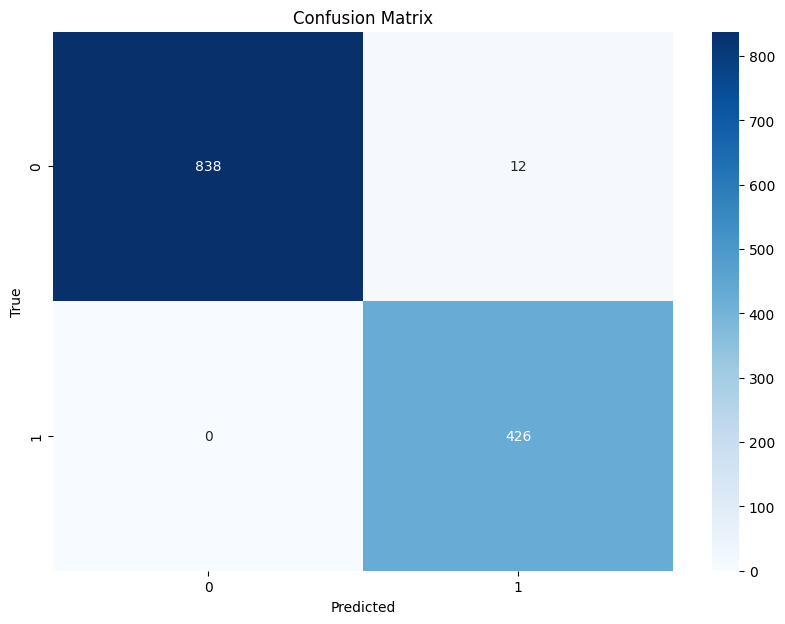

In [ ]:
conf = confusion_matrix(res['act'], res['pred'])
#the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.
plt.figure(figsize=(10, 7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [318]:
#accuracy
metrics.accuracy_score(res['act'], res['pred'])

0.9905956112852664

In [319]:
#prediction error =
1 - metrics.accuracy_score(res['act'], res['pred'])

0.009404388714733591

In [320]:
#recall / tpr
metrics.recall_score(res['act'], res['pred'])

1.0

In [321]:
#tnr
(conf[0, 0]) / conf[0,:].sum()

0.9858823529411764

In [322]:
#f1 score
f1_score(res['act'], res['pred'])

0.9861111111111112

In [323]:
#ROC
lr_fpr_sample, lr_tpr_sample, lr_thresholds_sample = metrics.roc_curve(res['act'], res['prob'])

roc_lr_sample = pd.DataFrame({
    'False Positive Rate': lr_fpr_sample,
    'True Positive Rate': lr_tpr_sample,
    'Model': 'Logistic Regression'
}, index=lr_thresholds_sample)


roc_sample_df = pd.concat([roc_lr_sample])


px.line(roc_lr_sample, y='True Positive Rate', x='False Positive Rate',
        color='Model',
        width=700, height=500
)


In [324]:
roc_auc_score(res['act'], res['prob'] )

0.99984534658934

our model is doing very well, we have a high accuracy, recall, true negative rate, and our ROC curve looks very good

# v) random forest and KNN 

## random forest

we will use a random forest classifier to predict if a student will improve their score or not

In [178]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn import metrics


import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [179]:
df = pd.read_csv("transformed_data.csv")
df.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
2389                      24          99            7               69   
3792                      26          77            6               63   
4989                      26          76            7               74   
2134                      25          86            6               59   
3093                      23          96            8               62   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
2389                  0                  3          73   
3792                  1                  4          66   
4989                  4                  3          70   
2134                  3                  3          69   
3093                  0                  4          69   

      Parental_Involvement_High  Parental_Involvement_Low  \
2389                       True                     False   
3792                      False                      True   
4989                       True                     False   
2134                      False                     False   
3093                      False                     False   

      Parental_Involvement_Medium  ...  Learning_Disabilities_Yes  \
2389                        False  ...                      False   
3792                        False  ...                      False   
4989                        False  ...                      False   
2134                         True  ...                      False   
3093                         True  ...                      False   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
2389                             False                                  True   
3792                             False                                  True   
4989                             False                                  True   
2134                             False                                  True   
3093                             False                                  True   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
2389                                  False                   False   
3792                                  False                   False   
4989                                  False                   False   
2134                                  False                   False   
3093                                  False                   False   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
2389                        False                     True          False   
3792                        False                     True          False   
4989                         True                    False           True   
2134                        False                     True           True   
3093                         True                    False           True   

      Gender_Male  Score_Change  
2389         True             4  
3792         True             3  
4989        False            -4  
2134        False            10  
3093        False             7  

[5 rows x 42 columns]

In [180]:
y = df["Score_Change"] > 0
y.sample(5)

6371     True
4286     True
3457     True
2311    False
1713    False
Name: Score_Change, dtype: bool

In [181]:
X = df.drop(columns=["Exam_Score", "Score_Change"])
X.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
3609                      19          97           10               51   
1642                      22          93            6               69   
3035                      19          96            7               95   
1409                      17          95            8               85   
6247                      20          71            6               63   

      Tutoring_Sessions  Physical_Activity  Parental_Involvement_High  \
3609                  3                  4                      False   
1642                  0                  3                      False   
3035                  3                  3                      False   
1409                  1                  2                      False   
6247                  1                  2                      False   

      Parental_Involvement_Low  Parental_Involvement_Medium  \
3609                     False                         True   
1642                     False                         True   
3035                     False                         True   
1409                     False                         True   
6247                      True                        False   

      Access_to_Resources_High  ...  Learning_Disabilities_No  \
3609                     False  ...                      True   
1642                      True  ...                     False   
3035                     False  ...                      True   
1409                     False  ...                      True   
6247                      True  ...                      True   

      Learning_Disabilities_Yes  Parental_Education_Level_College  \
3609                      False                              True   
1642                       True                             False   
3035                      False                              True   
1409                      False                              True   
6247                      False                              True   

      Parental_Education_Level_High School  \
3609                                 False   
1642                                  True   
3035                                 False   
1409                                 False   
6247                                 False   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
3609                                  False                    True   
1642                                  False                   False   
3035                                  False                   False   
1409                                  False                   False   
6247                                  False                   False   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
3609                        False                    False           True   
1642                        False                     True          False   
3035                        False                     True           True   
1409                         True                    False           True   
6247                         True                    False          False   

      Gender_Male  
3609        False  
1642         True  
3035        False  
1409        False  
6247         True  

[5 rows x 40 columns]

In [182]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

our model is doing very well, we have a high accuracy, recall, true negative rate, and our ROC curve looks very good

In [183]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Define a parameter grid for max_depth (tree depth)
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30, None]  # None means no limit (<=40)
}

# Set up GridSearchCV to find the best max_depth using cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(max_depth=30)

In [184]:
best_rf = best_model
best_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=30)

our cross validation says that a depth of 5 produces the best result

evaluating our random forest

In [185]:
res = pd.DataFrame(dict(
  act = y_test, 
  pred = best_rf.predict(x_test),
  prob = best_rf.predict_proba(x_test)[:,1]
))
res.sample(5)

act   pred  prob
5818  False  False  0.03
2897   True   True  0.90
821    True   True  0.86
5062   True   True  0.84
5300   True   True  0.87

In [186]:
best_rf.score(x_test, y_test)

0.9639498432601881

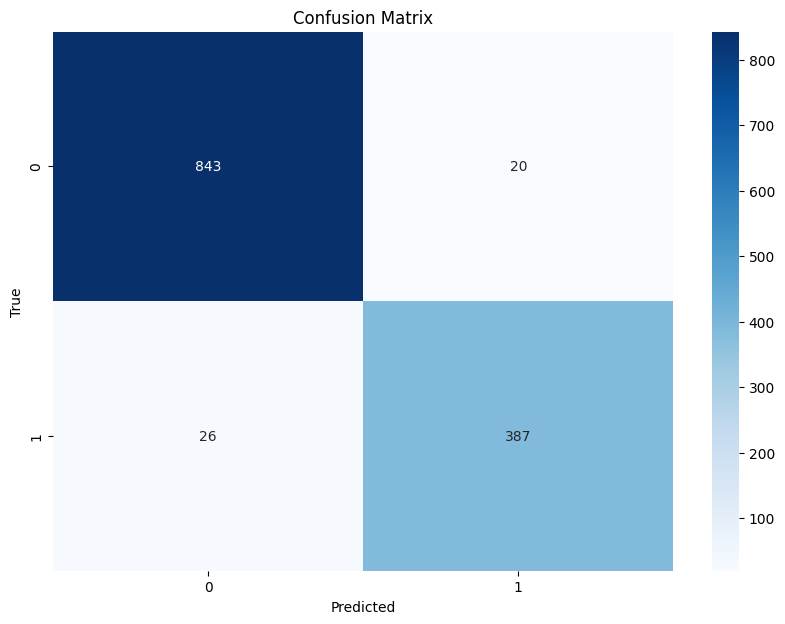

In [187]:

conf = confusion_matrix(res['act'], res['pred'])
#the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.
plt.figure(figsize=(10, 7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [188]:
#accuracy
metrics.accuracy_score(res['act'], res['pred'])

0.9639498432601881

In [189]:
#prediction error =
1 - metrics.accuracy_score(res['act'], res['pred'])

0.036050156739811934

In [190]:
#recall / tpr
metrics.recall_score(res['act'], res['pred'])

0.937046004842615

In [191]:
#tnr
(conf[0, 0]) / conf[0,:].sum()

0.9768250289687138

In [192]:
#ROC
lr_fpr_sample, lr_tpr_sample, lr_thresholds_sample = metrics.roc_curve(res['act'], res['prob'])

roc_lr_sample = pd.DataFrame({
    'False Positive Rate': lr_fpr_sample,
    'True Positive Rate': lr_tpr_sample,
    'Model': 'Logistic Regression'
}, index=lr_thresholds_sample)


roc_sample_df = pd.concat([roc_lr_sample])


px.line(roc_lr_sample, y='True Positive Rate', x='False Positive Rate',
        color='Model',
        width=700, height=500
)


In [193]:
roc_auc_score(res['act'], res['prob'] )

0.9926126272729567

Our Random Forest's performance is comparable to logistic regression, albeit slightly worse. 

## KNN

In [194]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix


import matplotlib.pyplot as plt
import plotly.express as px

In [195]:
df = pd.read_csv("transformed_data.csv")
df.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
3322                      30          97            6               66   
5752                      25          62            6               61   
3385                      23          88            8               84   
1569                      23          67            8               71   
707                       10          96            4               99   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
3322                  1                  2          74   
5752                  1                  4          64   
3385                  2                  3          71   
1569                  2                  4          66   
707                   1                  5          68   

      Parental_Involvement_High  Parental_Involvement_Low  \
3322                      False                     False   
5752                      False                     False   
3385                      False                      True   
1569                      False                     False   
707                       False                     False   

      Parental_Involvement_Medium  ...  Learning_Disabilities_Yes  \
3322                         True  ...                      False   
5752                         True  ...                      False   
3385                        False  ...                       True   
1569                         True  ...                      False   
707                          True  ...                      False   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
3322                              True                                 False   
5752                             False                                 False   
3385                             False                                 False   
1569                              True                                 False   
707                               True                                 False   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
3322                                  False                   False   
5752                                   True                   False   
3385                                   True                   False   
1569                                  False                   False   
707                                   False                   False   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
3322                        False                     True          False   
5752                         True                    False           True   
3385                        False                     True           True   
1569                         True                    False           True   
707                         False                     True           True   

      Gender_Male  Score_Change  
3322         True             8  
5752        False             3  
3385        False           -13  
1569        False            -5  
707         False           -31  

[5 rows x 42 columns]

In [196]:
y = df["Score_Change"] > 0

X = df.drop(columns=["Exam_Score", "Score_Change"])

scaled_df = df.copy().drop(columns=["Exam_Score", "Score_Change"])
numerical_cols = scaled_df.select_dtypes(include=['int64']).columns
scaler = StandardScaler()
scaled_df[numerical_cols] = scaler.fit_transform(scaled_df[numerical_cols])

x_scaled = scaled_df
x_scaled.head()

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
0                0.505278    0.344803    -0.023928        -0.143302   
1               -0.163081   -1.387019     0.657282        -1.115616   
2                0.672367    1.557079    -0.023928         1.106816   
3                1.507815    0.777759     0.657282         1.592974   
4               -0.163081    1.037532    -0.705139        -0.698910   

   Tutoring_Sessions  Physical_Activity  Parental_Involvement_High  \
0          -1.212085           0.026518                      False   
1           0.409708           0.998406                      False   
2           0.409708           0.998406                      False   
3          -0.401188           0.998406                      False   
4           1.220605           0.998406                      False   

   Parental_Involvement_Low  Parental_Involvement_Medium  \
0                      True                        False   
1                      True                        False   
2                     False                         True   
3                      True                        False   
4                     False                         True   

   Access_to_Resources_High  ...  Learning_Disabilities_No  \
0                      True  ...                      True   
1                     False  ...                      True   
2                     False  ...                      True   
3                     False  ...                      True   
4                     False  ...                      True   

   Learning_Disabilities_Yes  Parental_Education_Level_College  \
0                      False                             False   
1                      False                              True   
2                      False                             False   
3                      False                             False   
4                      False                              True   

   Parental_Education_Level_High School  \
0                                  True   
1                                 False   
2                                 False   
3                                  True   
4                                 False   

   Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
0                                  False                   False   
1                                  False                   False   
2                                   True                   False   
3                                  False                   False   
4                                  False                   False   

   Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
0                        False                     True          False   
1                         True                    False           True   
2                        False                     True          False   
3                         True                    False          False   
4                        False                     True           True   

   Gender_Male  
0         True  
1        False  
2         True  
3         True  
4        False  

[5 rows x 40 columns]

In [197]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

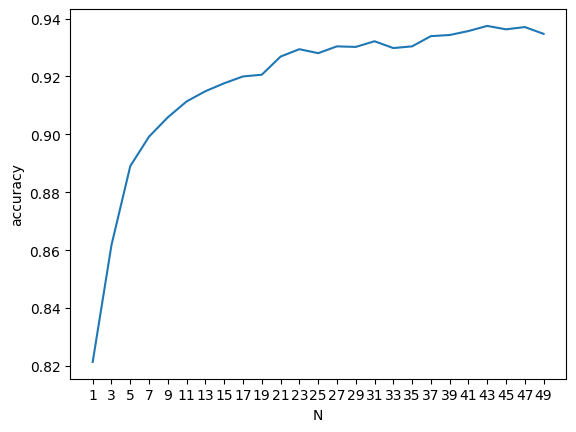

Optimal number of neighbors (K): 43


In [198]:
k_vals = range(1,51,2) # range from 1 to 50 neighbors (step size of 2)

cv_score = []

# Perform CV
for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_score.append(np.mean(scores))

# Plot the cross-validation results
plt.plot(k_vals, cv_score)
plt.xlabel("N")
plt.xticks(k_vals)
plt.ylabel("accuracy")
plt.show()

# Find the optimal k (the value with the lowest negative MSE)
optimal_k = k_vals[np.argmax(cv_score)]
print(f"Optimal number of neighbors (K): {optimal_k}")


In [199]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=43)

In [200]:
res = pd.DataFrame(dict(
  act = y_test, 
  pred = knn.predict(x_test),
  prob = knn.predict_proba(x_test)[:,1]
))
res.sample(5)

act   pred      prob
2138  False  False  0.255814
1530  False  False  0.000000
3818   True  False  0.488372
2320  False  False  0.023256
4551  False  False  0.139535

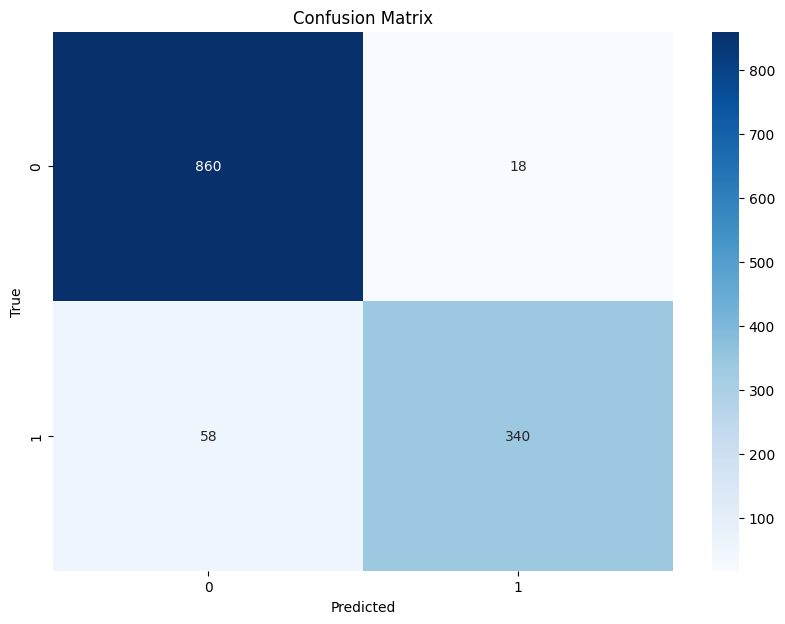

In [201]:
conf = confusion_matrix(res['act'], res['pred'])
#the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.
plt.figure(figsize=(10, 7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [202]:
#accuracy
metrics.accuracy_score(res['act'], res['pred'])

0.9404388714733543

In [203]:
#prediction error =
1 - metrics.accuracy_score(res['act'], res['pred'])

0.059561128526645746

In [204]:
#recall / tpr
metrics.recall_score(res['act'], res['pred'])

0.8542713567839196

In [205]:
#tnr
(conf[0, 0]) / conf[0,:].sum()

0.979498861047836

In [206]:
#ROC
lr_fpr_sample, lr_tpr_sample, lr_thresholds_sample = metrics.roc_curve(res['act'], res['prob'])

roc_lr_sample = pd.DataFrame({
    'False Positive Rate': lr_fpr_sample,
    'True Positive Rate': lr_tpr_sample,
    'Model': 'Logistic Regression'
}, index=lr_thresholds_sample)


roc_sample_df = pd.concat([roc_lr_sample])


px.line(roc_lr_sample, y='True Positive Rate', x='False Positive Rate',
        color='Model',
        width=700, height=500
)

In [207]:
roc_auc_score(res['act'], res['prob'] )

0.9872769313538078

similar to Random Forest, KNN does a good job at fitting the data, but is slightly worse than logistic regression

# vi) PCA and Clustering

In [208]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import plotly.express as px

In [209]:
df = pd.read_csv("transformed_data.csv")
df.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
5076                      32          87            6               55   
3782                      19          71            7               91   
3533                      33          66            6               59   
698                       21          73            6               85   
5506                      19          76           10               70   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
5076                  0                  3          71   
3782                  3                  1          66   
3533                  3                  2          70   
698                   6                  5          70   
5506                  1                  3          63   

      Parental_Involvement_High  Parental_Involvement_Low  \
5076                      False                     False   
3782                      False                     False   
3533                      False                     False   
698                       False                     False   
5506                      False                      True   

      Parental_Involvement_Medium  ...  Learning_Disabilities_Yes  \
5076                         True  ...                      False   
3782                         True  ...                      False   
3533                         True  ...                      False   
698                          True  ...                      False   
5506                        False  ...                      False   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
5076                             False                                  True   
3782                             False                                  True   
3533                             False                                 False   
698                               True                                 False   
5506                              True                                 False   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
5076                                  False                   False   
3782                                  False                   False   
3533                                   True                   False   
698                                   False                   False   
5506                                  False                    True   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
5076                        False                     True          False   
3782                         True                    False           True   
3533                        False                     True           True   
698                         False                     True          False   
5506                        False                    False           True   

      Gender_Male  Score_Change  
5076         True            16  
3782        False           -25  
3533        False            11  
698          True           -15  
5506        False            -7  

[5 rows x 42 columns]

## PCA

we will perform pca on our prediction data
- we will mean center and standard-deviation scale our data (excluding categorical variables)

In [210]:
# important that we drop our response variable
scaled_df = df.copy().drop(columns=["Exam_Score", "Score_Change"])

numerical_cols = scaled_df.select_dtypes(include=['int64']).columns
scaler = StandardScaler()
scaled_df[numerical_cols] = scaler.fit_transform(scaled_df[numerical_cols])
# setting one-hot columns to ints 
scaled_df[scaled_df.select_dtypes(include=['bool']).columns] = scaled_df.select_dtypes(include=['bool']).astype(int)
scaled_df.sample(5)


Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
5817                0.171098    0.171621     2.019702        -1.046165   
4911               -0.998529   -0.607699    -1.386349         0.829012   
221                -1.666887   -1.387019    -0.023928        -0.768361   
1251                1.006546   -0.174744    -1.386349        -0.560008   
1052                0.004009   -1.733384     1.338492        -0.143302   

      Tutoring_Sessions  Physical_Activity  Parental_Involvement_High  \
5817           1.220605           0.998406                          0   
4911           0.409708           0.998406                          1   
221           -1.212085           0.998406                          0   
1251          -0.401188           0.026518                          1   
1052           2.031501           0.998406                          0   

      Parental_Involvement_Low  Parental_Involvement_Medium  \
5817                         0                            1   
4911                         0                            0   
221                          0                            1   
1251                         0                            0   
1052                         0                            1   

      Access_to_Resources_High  ...  Learning_Disabilities_No  \
5817                         0  ...                         1   
4911                         0  ...                         1   
221                          1  ...                         0   
1251                         1  ...                         1   
1052                         0  ...                         1   

      Learning_Disabilities_Yes  Parental_Education_Level_College  \
5817                          0                                 0   
4911                          0                                 1   
221                           1                                 0   
1251                          0                                 0   
1052                          0                                 1   

      Parental_Education_Level_High School  \
5817                                     1   
4911                                     0   
221                                      1   
1251                                     1   
1052                                     0   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
5817                                      0                       0   
4911                                      0                       0   
221                                       0                       0   
1251                                      0                       0   
1052                                      0                       0   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
5817                            0                        1              1   
4911                            0                        1              1   
221                             1                        0              1   
1251                            1                        0              0   
1052                            0                        1              0   

      Gender_Male  
5817            0  
4911            0  
221             0  
1251            1  
1052            1  

[5 rows x 40 columns]

In [211]:
u,s,vh = np.linalg.svd(scaled_df)
v = vh.T

[(0, 0.34164038591161594),
 (1, 0.054980265136858955),
 (2, 0.054105467500842254),
 (3, 0.053757040115614364),
 (4, 0.05229492277328973),
 (5, 0.051204281680537304),
 (6, 0.04992622714839374),
 (7, 0.0257939572878531),
 (8, 0.0255166732602858),
 (9, 0.022419319023245815),
 (10, 0.02196114883364197),
 (11, 0.021553872465941273),
 (12, 0.02080358687271321),
 (13, 0.02069495589560597),
 (14, 0.020452909291477094),
 (15, 0.020240841605596346),
 (16, 0.01964549663184825),
 (17, 0.01948570514261525),
 (18, 0.013152406051659385),
 (19, 0.012541141418314264),
 (20, 0.012293992222875721),
 (21, 0.012246264589144969),
 (22, 0.011841568381625566),
 (23, 0.011521646616405085),
 (24, 0.009414940418501033),
 (25, 0.007083543138350393),
 (26, 0.00704908036024405),
 (27, 0.006378360224903195),
 (28, 6.737668602257329e-32),
 (29, 6.348469833783414e-33),
 (30, 5.606404457244697e-33),
 (31, 3.5803746434875684e-33),
 (32, 2.7414215619206324e-33),
 (33, 2.5343221491236437e-33),
 (34, 2.395452805479779e-33)

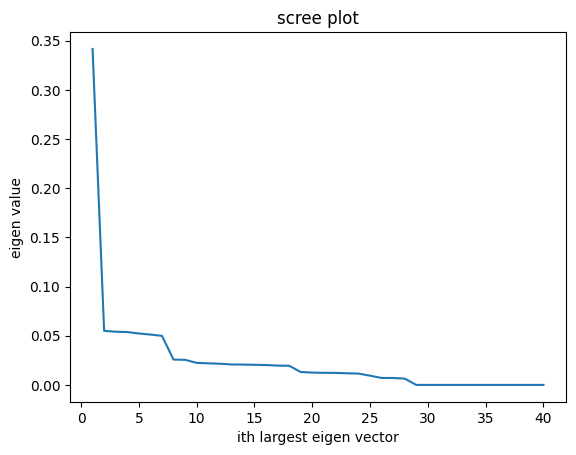

In [212]:
vars = np.square(s)
total_var = np.sum(vars)
"total variance", total_var
percent_var = vars/total_var
plt.plot(range(1, len(percent_var) + 1), percent_var)
plt.title("scree plot")
plt.ylabel("eigen value")
plt.xlabel("ith largest eigen vector")
list(enumerate(percent_var))


from our scree plot, we see that first principal component has the highest variation while most others have less variation.

In [213]:
sum(percent_var[:16])

0.857345854803513

to reduce the dimensionality of the data, we will only use principal components with a proportion of variance >=0.2: the first 16 PC's account for 86 % of the variability

In [214]:
# put the loadings for PC1 in a data frame
loadings1 = pd.DataFrame(
    {"feature": scaled_df.columns,
     "pc1_loading": vh[0]
     })
# look at the 10 largest (absolute value) loadings for PC1 but print out the signed value
loadings1.reindex(loadings1["pc1_loading"].abs().sort_values(ascending=False).index) \
    .head(10)

feature  pc1_loading
18             Internet_Access_Yes    -0.364970
30        Learning_Disabilities_No    -0.354694
26              School_Type_Public    -0.277202
24          Teacher_Quality_Medium    -0.240007
37         Distance_from_Home_Near    -0.238291
13  Extracurricular_Activities_Yes    -0.236386
39                     Gender_Male    -0.229028
8      Parental_Involvement_Medium    -0.203650
16         Motivation_Level_Medium    -0.202746
11      Access_to_Resources_Medium    -0.200517

In [215]:
# put the loadings for PC2 in a data frame
loadings2 = pd.DataFrame(
    {"feature": scaled_df.columns,
     "pc2_loading": vh[1]
     })
# look at the 10 largest (absolute value) loadings for PC2 but print out the signed value
loadings2.reindex(loadings2["pc2_loading"].abs().sort_values(ascending=False).index) \
    .head(10)

feature  pc2_loading
1                             Attendance    -0.530130
0                 Hours_Studied_Per_Week     0.489049
3                        Previous_Scores     0.482920
4                      Tutoring_Sessions    -0.431940
2                            Sleep_Hours     0.228748
5                      Physical_Activity     0.075047
33  Parental_Education_Level_High School     0.021219
32      Parental_Education_Level_College    -0.013745
37               Distance_from_Home_Near    -0.013512
21                  Family_Income_Medium     0.011317

In [216]:
vh_k = vh[:16]
vh_k.shape #expect 16x #features

(16, 40)

In [217]:
pca_scaled= scaled_df @ vh_k.T
pca_scaled.columns = ["PC" + str(1 + col) for col in pca_scaled.columns]
pca_scaled.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.676485  0.538157 -0.440957  0.559043 -0.057349  1.041448 -0.069853   
1 -2.414635  0.186480  2.128333 -0.071981  0.288688 -0.080515 -0.576401   
2 -2.936074 -0.092377 -0.536675 -0.868524 -1.384697  0.527511  1.464263   
3 -2.734005  1.526738 -0.349569 -0.467300 -1.456618  0.592148  1.408511   
4 -2.783703 -1.587723  0.466373 -0.972204 -0.841322  0.419609  0.165178   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.092106  0.889637  0.323765  0.808319  0.317358  1.253110  0.148344   
1 -1.095563  0.015274  1.049080 -0.059895  0.953623 -0.942496 -0.051327   
2  0.721905  0.030121  0.273992 -1.289016 -0.007083  0.001521 -0.352508   
3  0.816131 -0.288614  0.755524 -0.108265  0.401408 -0.127678 -0.932815   
4 -0.422203 -0.748037  0.136526 -1.212818 -1.093185 -0.771911  0.300216   

       PC15      PC16  
0 -0.995196 -0.160808  
1  0.180975  0.250144  
2  0.605619  0.452852  
3  0.586114 -0.340108  
4  0.638477  0.233082

In [218]:
colors = ["improved" if a else "did not improve" for a in df["Score_Change"] > 0]
px.scatter(pca_scaled, x="PC1", y="PC2", color = colors)

In [219]:
colors = ["improved" if a else "did not improve" for a in df["Score_Change"] > 0]
px.scatter_3d(pca_scaled, x="PC1", y="PC2", z="PC3", color = colors)

There seems to be decent separated with a bit of overlap
- however, this might be because we are projecting into a smaller dimension. The data might be better separated in the higher dimensional space

## Clustering

In [220]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score, adjusted_rand_score

we will cluster the PCA-Transformed data
- we have already seen in our 3d scatter of the PC's that the data has begun to seperate, so using the PCA-transformed data should help

We know that our data should have two distinct clusters - "improved score" and "did not improve score", so we will use two clusters
- we will compare the quality of kmeans and agglomerative clustering and how well they relate to the actual labels

In [221]:
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(pca_scaled)
kmeans.cluster_centers_

array([[-2.54076000e+00,  5.20664251e-01,  3.67504699e-01,
        -1.32448767e-01,  3.32632510e-01, -2.40433675e-01,
        -3.53934022e-01, -1.23068126e-04, -8.92451136e-03,
        -2.16220495e-02,  1.22946949e-02,  7.65126352e-03,
        -1.38139413e-02,  1.00961383e-02, -7.19210064e-04,
        -1.75555643e-03],
       [-2.53452948e+00, -5.46346779e-01, -3.85589575e-01,
         1.41340222e-01, -3.48475353e-01,  2.49286708e-01,
         3.72452242e-01, -2.30305195e-02,  1.00540538e-02,
        -1.13560086e-03,  1.90704064e-02, -4.48225410e-03,
        -2.14906621e-02,  8.39102649e-03,  6.79106834e-04,
        -1.59484135e-02]])

In [222]:
px.scatter_3d(pca_scaled, x="PC1", y="PC2", z="PC3", color=y_kmeans, title="K means separation of data")

In [223]:
same_diff = y_kmeans==(df["Score_Change"] > 0).astype('int')
prop = sum(same_diff)/len(same_diff)
print(max(prop, 1-prop))
same_diff = ["same" if s else "diff" for s in same_diff] 
px.scatter_3d(pca_scaled, x="PC1", y="PC2", z="PC3", color=same_diff, title="KMeans consistency with data (should expect one color dominant)")


0.5637447075427316


C:\Users\morga\AppData\Local\Temp\ipykernel_24336\1521651174.py:9: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



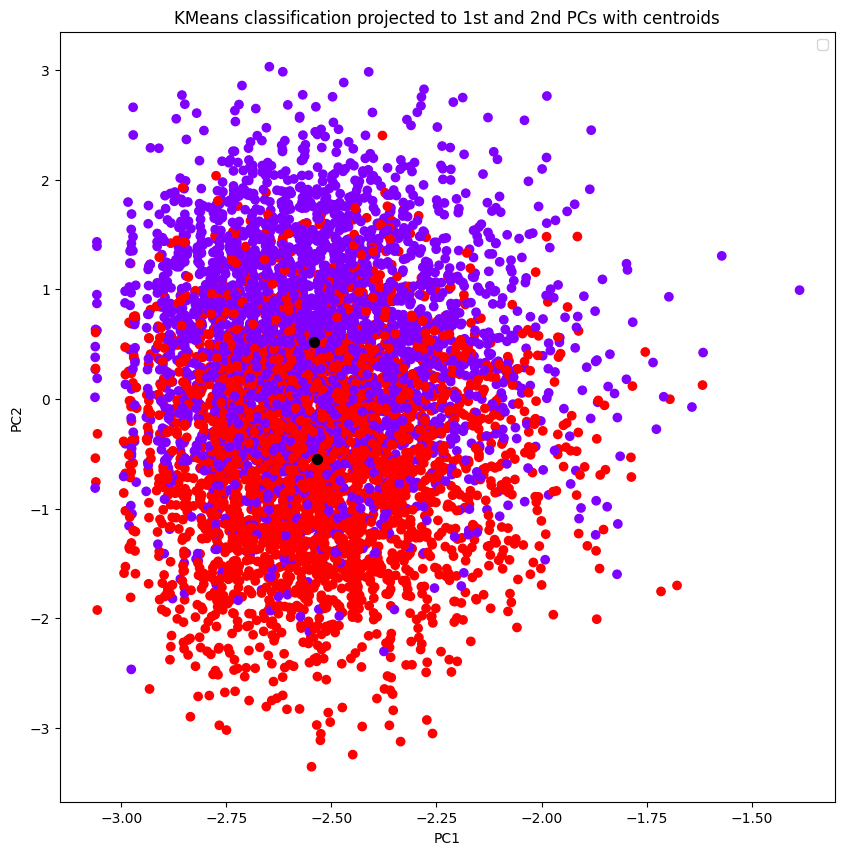

In [224]:
plt.figure(figsize=(10,10))
# Using average drive and fairway p
plt.scatter(pca_scaled['PC1'], pca_scaled['PC2'], c = y_kmeans, cmap='rainbow')
centroids = kmeans.cluster_centers_
plt.scatter(centroids [:, 0], centroids[:, 1], c='black', s=50)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans classification projected to 1st and 2nd PCs with centroids")
plt.legend()
plt.show()


k means has done a good job of separating the data. Furthermore, since we have the labels we can also see that the clustering has done a good job of creating clusters that actually reflect the labels (which we did not provide)

In [225]:
hclust = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
hclust_labels = hclust.fit(pca_scaled).labels_

In [226]:
px.scatter_3d(pca_scaled, x="PC1", y="PC2", z="PC3", color=hclust_labels, title="Agglomerative clustering separation of data")

In [227]:
same_diff = hclust_labels==(df["Score_Change"] > 0).astype('int')
prop = sum(same_diff)/len(same_diff)
print(max(prop, 1-prop))
same_diff = ["same" if s else "diff" for s in same_diff] 
px.scatter_3d(pca_scaled, x="PC1", y="PC2", z="PC3", color=same_diff, title="Agglomerative clustering consistency with data (should expect one color dominant)")


0.569233181746903


C:\Users\morga\AppData\Local\Temp\ipykernel_24336\3994408844.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



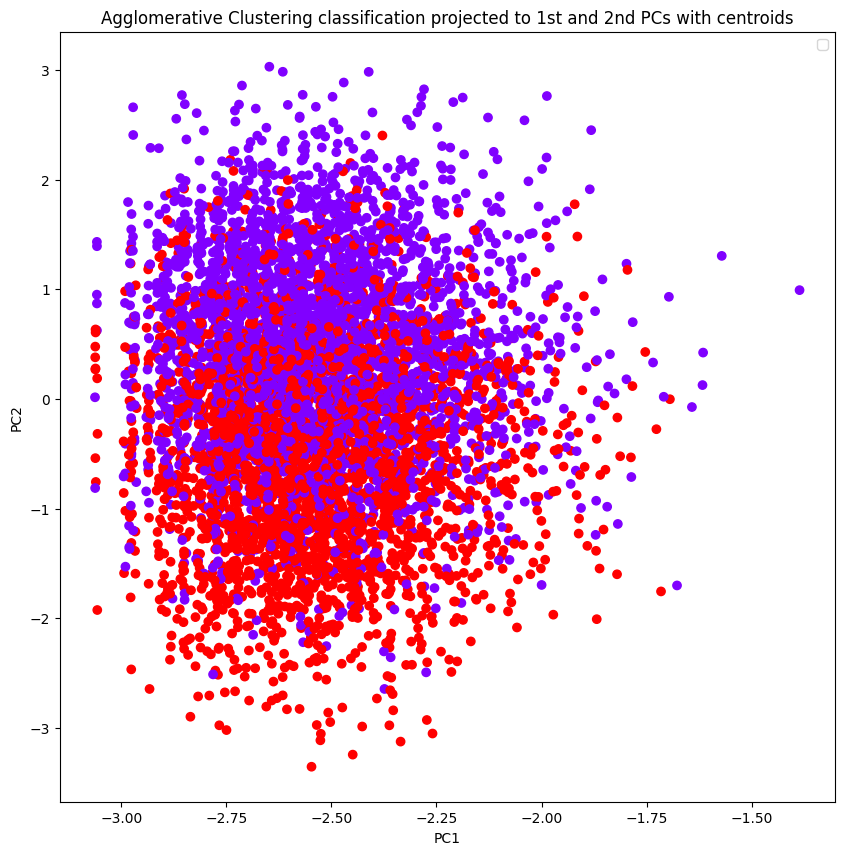

In [228]:
plt.figure(figsize=(10,10))
# Using average drive and fairway p
plt.scatter(pca_scaled['PC1'], pca_scaled['PC2'], c = hclust_labels, cmap='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Agglomerative Clustering classification projected to 1st and 2nd PCs with centroids")
plt.legend()
plt.show()


agglomerative clustering seems to do a worse job of seperating data and matching the labels

### comparing clustering

In [229]:
kmeans.inertia_

58002.05038169006

In [230]:
silhouette_score(pca_scaled, y_kmeans)

0.0750721169378806

In [231]:
silhouette_score(pca_scaled, hclust_labels)

0.04615634225246989

both have low silhouette scores implying the clusters are close together, mixed
- this reflects what we saw in graphs

In [232]:
rand_score(y_kmeans, hclust_labels)

0.677773243673498

a high rand score implies they are clustering in similar ways

### conclusion

Clustering can be useful in cases where we do not have labels for unsupervised machine learning methods. When clustering our data, it was interesting to see that clustering the PCA-transformed data was able to create clusters that matched up well with our dataset. However, since we do have labels for our data, clustering is not a very appropriate tool to be using. 


PCA has proven to be much more useful. With PCA, we are able to reduce the dimension of our data from 40 features to 16 principal components. Furthermore these principal components help separate the data for us too. PCA is useful to reduce computation costs and process the data

# vii)viii) Neural Networks and hyperparameter tuning

In [233]:
import numpy as np
import pandas as pd
import plotly.express as px

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn import metrics

In [234]:
df = pd.read_csv("transformed_data.csv")
df.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
3895                      13          66            9               51   
5303                      12          97            6               79   
1269                      19          82            7               57   
470                       15          97            9               67   
6158                      27          74            6               51   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
3895                  3                  2          63   
5303                  1                  2          65   
1269                  1                  3          67   
470                   1                  2          68   
6158                  2                  4          68   

      Parental_Involvement_High  Parental_Involvement_Low  \
3895                       True                     False   
5303                      False                      True   
1269                      False                     False   
470                       False                      True   
6158                      False                     False   

      Parental_Involvement_Medium  ...  Learning_Disabilities_Yes  \
3895                        False  ...                      False   
5303                        False  ...                      False   
1269                         True  ...                      False   
470                         False  ...                      False   
6158                         True  ...                      False   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
3895                             False                                 False   
5303                             False                                  True   
1269                             False                                  True   
470                               True                                 False   
6158                             False                                  True   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
3895                                   True                   False   
5303                                  False                   False   
1269                                  False                   False   
470                                   False                   False   
6158                                  False                    True   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
3895                         True                    False          False   
5303                        False                     True          False   
1269                        False                     True          False   
470                         False                     True          False   
6158                        False                    False          False   

      Gender_Male  Score_Change  
3895         True            12  
5303         True           -14  
1269         True            10  
470          True             1  
6158         True            17  

[5 rows x 42 columns]

we will create a NN for predicting if a students score improves or not

In [235]:
y = (df["Score_Change"] > 0).astype('int')
y_tensor = torch.tensor(y.values.reshape(-1, 1), dtype=torch.float32)
y_tensor


tensor([[0.],
        [1.],
        [0.],
        ...,
        [1.],
        [0.],
        [0.]])

In [236]:
X = df.drop(columns=["Exam_Score", "Score_Change"])

scaled_df = df.copy().drop(columns=["Exam_Score", "Score_Change"])
numerical_cols = scaled_df.select_dtypes(include=['int64']).columns
scaler = StandardScaler()
scaled_df[numerical_cols] = scaler.fit_transform(scaled_df[numerical_cols])
scaled_df[scaled_df.select_dtypes(include=['bool']).columns] = scaled_df.select_dtypes(include=['bool']).astype(int)

x_scaled = scaled_df
x_tensor = torch.tensor(x_scaled.values, dtype=torch.float32)
x_scaled.head()

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
0                0.505278    0.344803    -0.023928        -0.143302   
1               -0.163081   -1.387019     0.657282        -1.115616   
2                0.672367    1.557079    -0.023928         1.106816   
3                1.507815    0.777759     0.657282         1.592974   
4               -0.163081    1.037532    -0.705139        -0.698910   

   Tutoring_Sessions  Physical_Activity  Parental_Involvement_High  \
0          -1.212085           0.026518                          0   
1           0.409708           0.998406                          0   
2           0.409708           0.998406                          0   
3          -0.401188           0.998406                          0   
4           1.220605           0.998406                          0   

   Parental_Involvement_Low  Parental_Involvement_Medium  \
0                         1                            0   
1                         1                            0   
2                         0                            1   
3                         1                            0   
4                         0                            1   

   Access_to_Resources_High  ...  Learning_Disabilities_No  \
0                         1  ...                         1   
1                         0  ...                         1   
2                         0  ...                         1   
3                         0  ...                         1   
4                         0  ...                         1   

   Learning_Disabilities_Yes  Parental_Education_Level_College  \
0                          0                                 0   
1                          0                                 1   
2                          0                                 0   
3                          0                                 0   
4                          0                                 1   

   Parental_Education_Level_High School  \
0                                     1   
1                                     0   
2                                     0   
3                                     1   
4                                     0   

   Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
0                                      0                       0   
1                                      0                       0   
2                                      1                       0   
3                                      0                       0   
4                                      0                       0   

   Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
0                            0                        1              0   
1                            1                        0              1   
2                            0                        1              0   
3                            1                        0              0   
4                            0                        1              1   

   Gender_Male  
0            1  
1            0  
2            1  
3            1  
4            0  

[5 rows x 40 columns]

In [237]:
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor)

In [238]:
class SimpleNN(nn.Module):
    def __init__(self, insize, hidden_size): 
        super(SimpleNN, self).__init__()
        self.hidden1 = nn.Linear(insize, hidden_size)
        self.relu1 = nn.ReLU()
        self.out = nn.Linear(hidden_size, 1)
        self.sigmoid_out = nn.Sigmoid()
    def forward(self, x):
        zh = self.hidden1(x)
        ah = self.relu1(zh)
        z_out = self.out(ah)
        a_out = self.sigmoid_out(z_out)
        return a_out
        

In [251]:
n_features = x_tensor.shape[1]
model = SimpleNN(n_features, int(n_features**(1/2))) #geo mean hidden layer size
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [252]:
def train(model, loss_fn, optimizer, epochs=100):
    for epoch in range(epochs):
      prediction = model(x_train)
      loss = loss_fn(prediction, y_train)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if(epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

train(model, loss_fn, optimizer)

Epoch [10/100], Loss: 0.5858
Epoch [20/100], Loss: 0.5143
Epoch [30/100], Loss: 0.4451
Epoch [40/100], Loss: 0.3747
Epoch [50/100], Loss: 0.3101
Epoch [60/100], Loss: 0.2569
Epoch [70/100], Loss: 0.2172
Epoch [80/100], Loss: 0.1886
Epoch [90/100], Loss: 0.1679
Epoch [100/100], Loss: 0.1527


this is our simple model, we will now select hyper parameters

In [253]:
kf = KFold(n_splits=5, shuffle=True)
learning_rates = [1e-5,1e-4,1e-3,1e-2,1e-1,1]
hidden_layer_options = range(6,41,4) # 40 input, 1 ouput, considering on range [in dim, sqrt(in dim)]


In [ ]:
best_score = np.inf
def train_and_evaluate(hidden_dim, learning_rate):
    fold_scores = []
    for train_idx, val_idx in kf.split(x_tensor):
        X_train, X_val = x_tensor[train_idx], x_tensor[val_idx]
        y_train, y_val = y_tensor[train_idx], y_tensor[val_idx]

        # create model, loss, optimizer
        model = SimpleNN(X.shape[1], hidden_dim)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        # Training
        for epoch in range(10):  
            model.train()
            optimizer.zero_grad()
            predictions = model(X_train)
            loss = criterion(predictions, y_train)
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            val_predictions = model(X_val)
            val_loss = criterion(val_predictions, y_val).item()
            fold_scores.append(val_loss) 

    return np.mean(fold_scores)


for hidden_dim in hidden_layer_options:
    for lr in learning_rates:
            avg_score = train_and_evaluate(hidden_dim, lr)
            print(f"Params: hidden_dim={hidden_dim}, lr={lr}, avg_score={avg_score:.4f}")

            # get min loss/score
            if avg_score < best_score:
                best_score = avg_score
                best_params = {'hidden_dim': hidden_dim, 'lr': lr}

# Best hyperparameters
print(f"Best Params: {best_params} with score: {best_score:.4f}")


Params: hidden_dim=6, lr=1e-05, avg_score=0.6771
Params: hidden_dim=6, lr=0.0001, avg_score=0.7053
Params: hidden_dim=6, lr=0.001, avg_score=0.7260
Params: hidden_dim=6, lr=0.01, avg_score=0.5765
Params: hidden_dim=6, lr=0.1, avg_score=0.3493
Params: hidden_dim=6, lr=1, avg_score=46.5467
Params: hidden_dim=10, lr=1e-05, avg_score=0.7229
Params: hidden_dim=10, lr=0.0001, avg_score=0.6884
Params: hidden_dim=10, lr=0.001, avg_score=0.6720
Params: hidden_dim=10, lr=0.01, avg_score=0.5714
Params: hidden_dim=10, lr=0.1, avg_score=0.3031
Params: hidden_dim=10, lr=1, avg_score=46.8396
Params: hidden_dim=14, lr=1e-05, avg_score=0.6793
Params: hidden_dim=14, lr=0.0001, avg_score=0.6803
Params: hidden_dim=14, lr=0.001, avg_score=0.6485
Params: hidden_dim=14, lr=0.01, avg_score=0.5497
Params: hidden_dim=14, lr=0.1, avg_score=0.3427
Params: hidden_dim=14, lr=1, avg_score=39.6917
Params: hidden_dim=18, lr=1e-05, avg_score=0.7209
Params: hidden_dim=18, lr=0.0001, avg_score=0.6999
Params: hidden_dim=1

In [255]:
model = SimpleNN(x_tensor.shape[1], best_params['hidden_dim'])
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=best_params['lr'])
train(model, loss_fn, optimizer)

Epoch [10/100], Loss: 0.3117
Epoch [20/100], Loss: 0.1039
Epoch [30/100], Loss: 0.0858
Epoch [40/100], Loss: 0.0801
Epoch [50/100], Loss: 0.0778
Epoch [60/100], Loss: 0.0766
Epoch [70/100], Loss: 0.0748
Epoch [80/100], Loss: 0.0735
Epoch [90/100], Loss: 0.0716
Epoch [100/100], Loss: 0.0693


evaluating model

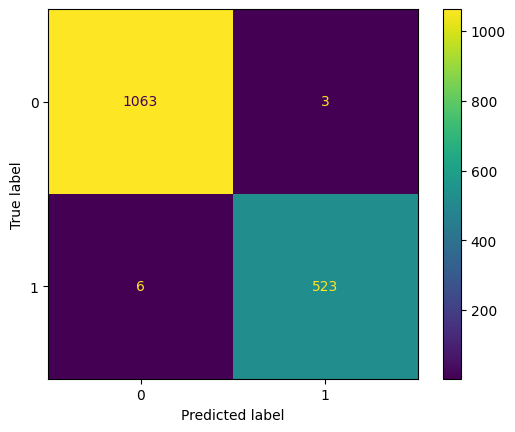

In [256]:
with torch.no_grad():
    pred = model(x_test)
pred_class = pred > 0.5
metrics.ConfusionMatrixDisplay(confusion_matrix(y_test==1, pred_class)).plot()


In [257]:
accuracy_score(y_test, pred_class )

0.9943573667711598

In [258]:
precision_score(y_test, pred_class)

0.9942965779467681

In [259]:
recall_score(y_test, pred_class)

0.9886578449905482

In [260]:
f1_score(y_test, pred_class)

0.9914691943127962

In [261]:
roc_auc_score(y_test, pred)

0.9958344712136957

In [262]:
#ROC
lr_fpr_sample, lr_tpr_sample, lr_thresholds_sample = metrics.roc_curve(y_test, pred)

roc_lr_sample = pd.DataFrame({
    'False Positive Rate': lr_fpr_sample,
    'True Positive Rate': lr_tpr_sample,
    'Model': 'Logistic Regression'
}, index=lr_thresholds_sample)


roc_sample_df = pd.concat([roc_lr_sample])


px.line(roc_lr_sample, y='True Positive Rate', x='False Positive Rate',
        color='Model',
        width=700, height=500
)


our NN performs very well, but also on par with our logistic regression method.